In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## First look at train dataset

In [10]:
df = pd.read_csv('../data/train.csv', index_col=0)

In [17]:
df.shape

(28587, 274)

U skupu za treniranje imamo 28587 redaka s 274 kolone.

In [21]:
df.head()

,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,Dx_Discharge,Discharge_Status,Weight_Discharge,Height_Discharge,Education,Current_Work_Status,Label,acarbose_count,acetylsalicylic_acid_count,aciclovir_count,albumin_count,allopurinol_count,alprazolam_count,alprostadil_count,aminophylline_count,amiodarone_count,amlodipine_count,amoxicillin_count,amoxicillin_and_betalactamase_inhibitor_count,ampicillin_count,ampicillin_and_betalactamase_inhibitor_count,apixaban_count,atenolol_count,atorvastatin_count,atropine_count,azithromycin_count,b03aa07_count,benzathine_benzylpenicillin_count,betamethasone_count,bisoprolol_count,bromazepam_count,butylscopolamine_count,calcium_chloride_count,carbamazepine_count,carbohydrates_count,carvedilol_count,cefalexin_count,cefazolin_count,cefepime_count,ceftazidime_count,ceftazidime_and_betalactamase_inhibitor_count,ceftriaxone_count,cefuroxime_count,chloramphenicol_count,chlorhexidine_count,chloropyramine_count,ciprofloxacin_count,clindamycin_count,clonazepam_count,clopidogrel_count,clotrimazole_count,coagulation_factor_ix_ii_vii_and_x_in_combination_count,coagulation_factor_viia_count,colchicine_count,colecalciferol_count,colistin_count,combinations_count,dabigatran_etexilate_count,dapagliflozin_count,dexamethasone_count,dexamethasone_and_antiinfectives_count,dexmedetomidine_count,diazepam_count,diclofenac_count,diltiazem_count,dobutamine_count,doxazosin_count,electrolytes_count,empagliflozin_count,enoxaparin_count,epinephrine_count,eplerenone_count,erythromycin_count,escitalopram_count,esomeprazole_count,etomidate_count,exemestane_count,fentanyl_count,ferric_oxide_polymaltose_complexes_count,ferrous_fumarate_count,flucloxacillin_count,fluconazole_count,flumazenil_count,folic_acid_count,fondaparinux_count,fosfomycin_count,furosemide_count,gentamicin_count,gliclazide_count,glimepiride_count,gliquidone_count,glyceryl_trinitrate_count,haloperidol_count,heparin_count,hydrocortisone_count,ibuprofen_count,indapamide_count,indometacin_count,insulin_aspart_count,insulin_glargine_count,insulin_human_count,iodixanol_count,iohexol_count,ipratropium_bromide_count,isosorbide_dinitrate_count,isosorbide_mononitrate_count,ivabradine_count,ketamine_count,ketoprofen_count,lacidipine_count,lactulose_count,lamotrigine_count,lercanidipine_count,levetiracetam_count,levobupivacaine_count,levodopa_and_decarboxylase_inhibitor_count,levofloxacin_count,levothyroxine_sodium_count,lidocaine_count,linagliptin_count,linezolid_count,lisinopril_count,loperamide_count,loratadine_count,lorazepam_count,losartan_count,losartan_and_diuretics_count,macrogol_combinations_count,mannitol_count,memantine_count,meropenem_count,mesalazine_count,metamizole_sodium_count,metformin_count,metformin_and_alogliptin_count,metformin_and_empagliflozin_count,metformin_and_vildagliptin_count,methylphenobarbital_count,methylprednisolone_count,metildigoxin_count,metoclopramide_count,metoprolol_count,metronidazole_count,miconazole_count,midazolam_count,mirtazapine_count,mometasone_count,montelukast_count,morphine_count,moxifloxacin_count,moxonidine_count,mupirocin_count,n02bf01_count,n02bf02_count,nadroparin_count,naloxone_count,nebivolol_count,neostigmine_count,nitrazepam_count,nitrofurantoin_count,norepinephrine_count,norfloxacin_count,octreotide_count,omega3triglycerides_incl_other_esters_and_acids_count,ondansetron_count,organoheparinoid_count,oseltamivir_count,oxazepam_count,pantoprazole_count,paracetamol_count,paroxetine_count,perindopril_count,perindopril_amlodipine_and_indapamide_count,perindopril_and_amlodipine_count,perindopril_and_diuretics_count,pethidine_count,phenobarbital_count,pholcodine_count,phytomenadione_count,piperacillin_and_betalactamase_inhibitor_count,potassium_chloride_count,potassium_different_salts_in_combination_count,prasugrel_count,prednisone_count,promazine_count,propafenone_count,propofol_count,protamine_count,quetiapine_count,rabeprazole_count,ramipril_count,ramip

Gore se vidi prvih 5 redaka skupa za treniranje. Nama je od interesa razviti model koji predviđa kolonu naziva "Label". 0 -> Nije doslo do rehospitalizacije, 1 -> doslo je do rehospitalizacije.

U nastavku se vidi koliko koja kolona ima nedostajućih vrijednosti. 
AdmissionDx ima 468, Education 38, itd.
Broj nedostajućih vrijednosti je mal u usporedbi s veličinom dataset-a.

In [23]:
df.isna().sum()

AdmissionDx                                                468
AdmissionType                                                0
PreviousAdmissionDays                                        0
LOS                                                          0
Age_Group                                                    0
Gender                                                       2
Surgery_Count                                                0
LOS_ICU                                                      0
Discharge_Specialty                                          0
Dx_Discharge                                                 0
Discharge_Status                                             0
Weight_Discharge                                             0
Height_Discharge                                             0
Education                                                   38
Current_Work_Status                                         22
Label                                                  

<Axes: title={'center': 'Broj rehospitalizacija (1) u train setu'}, xlabel='Label'>

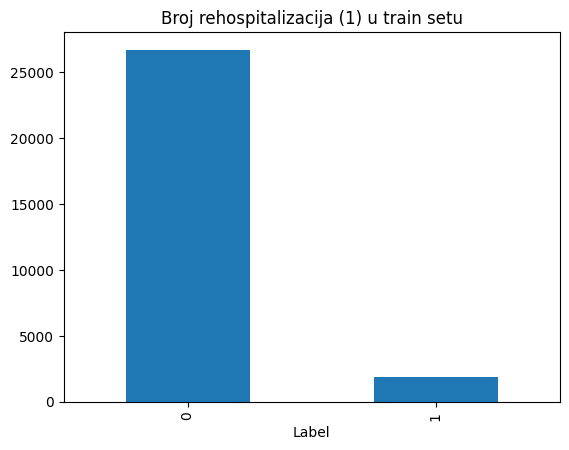

In [32]:
df.Label.value_counts().plot(kind='bar', title='Broj rehospitalizacija (1) u train setu')

Na gorenjem grafu vidimo da je skup podataka nebalansiran. Imamo relativno malo primjera rehospitalizacije.

## First look at test dataset

In [18]:
df_test = pd.read_csv('../data/test.csv', index_col=0)

In [19]:
df_test.shape

(7336, 276)

U skupu za testiranje imamo 7336 redaka, te 276 kolone. Dakle imamo 2 kolone više nego u skupu za treniranje.

In [20]:
df_test.head()

,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,Dx_Discharge,Discharge_Status,Weight_Discharge,Height_Discharge,Education,Current_Work_Status,acarbose_count,acetylsalicylic_acid_count,aciclovir_count,albumin_count,allopurinol_count,alprazolam_count,alprostadil_count,aminophylline_count,amiodarone_count,amlodipine_count,amoxicillin_count,amoxicillin_and_betalactamase_inhibitor_count,ampicillin_count,ampicillin_and_betalactamase_inhibitor_count,apixaban_count,atenolol_count,atorvastatin_count,atropine_count,azithromycin_count,b03aa07_count,benzathine_benzylpenicillin_count,betamethasone_count,bisoprolol_count,bromazepam_count,butylscopolamine_count,calcium_chloride_count,carbamazepine_count,carbohydrates_count,carvedilol_count,cefalexin_count,cefazolin_count,cefepime_count,ceftazidime_count,ceftazidime_and_betalactamase_inhibitor_count,ceftriaxone_count,cefuroxime_count,chloramphenicol_count,chlorhexidine_count,chloropyramine_count,ciprofloxacin_count,clindamycin_count,clonazepam_count,clopidogrel_count,clotrimazole_count,coagulation_factor_ix_ii_vii_and_x_in_combination_count,coagulation_factor_viia_count,colchicine_count,colecalciferol_count,colistin_count,combinations_count,dabigatran_etexilate_count,dapagliflozin_count,dexamethasone_count,dexamethasone_and_antiinfectives_count,dexmedetomidine_count,diazepam_count,diclofenac_count,diltiazem_count,dobutamine_count,doxazosin_count,electrolytes_count,empagliflozin_count,enoxaparin_count,epinephrine_count,eplerenone_count,erythromycin_count,escitalopram_count,esomeprazole_count,etomidate_count,exemestane_count,fentanyl_count,ferric_oxide_polymaltose_complexes_count,ferrous_fumarate_count,flucloxacillin_count,fluconazole_count,flumazenil_count,folic_acid_count,fondaparinux_count,fosfomycin_count,furosemide_count,gentamicin_count,gliclazide_count,glimepiride_count,gliquidone_count,glyceryl_trinitrate_count,haloperidol_count,heparin_count,hydrocortisone_count,ibuprofen_count,indapamide_count,indometacin_count,insulin_aspart_count,insulin_glargine_count,insulin_human_count,iodixanol_count,iohexol_count,ipratropium_bromide_count,isosorbide_dinitrate_count,isosorbide_mononitrate_count,ivabradine_count,ketamine_count,ketoprofen_count,lacidipine_count,lactulose_count,lamotrigine_count,lercanidipine_count,levetiracetam_count,levobupivacaine_count,levodopa_and_decarboxylase_inhibitor_count,levofloxacin_count,levothyroxine_sodium_count,lidocaine_count,linagliptin_count,linezolid_count,lisinopril_count,loperamide_count,loratadine_count,lorazepam_count,losartan_count,losartan_and_diuretics_count,macrogol_combinations_count,mannitol_count,memantine_count,meropenem_count,mesalazine_count,metamizole_sodium_count,metformin_count,metformin_and_alogliptin_count,metformin_and_empagliflozin_count,metformin_and_vildagliptin_count,methylphenobarbital_count,methylprednisolone_count,metildigoxin_count,metoclopramide_count,metoprolol_count,metronidazole_count,miconazole_count,midazolam_count,mirtazapine_count,mometasone_count,montelukast_count,morphine_count,moxifloxacin_count,moxonidine_count,mupirocin_count,n02bf01_count,n02bf02_count,nadroparin_count,naloxone_count,nebivolol_count,neostigmine_count,nitrazepam_count,nitrofurantoin_count,norepinephrine_count,norfloxacin_count,octreotide_count,omega3triglycerides_incl_other_esters_and_acids_count,ondansetron_count,organoheparinoid_count,oseltamivir_count,oxazepam_count,pantoprazole_count,paracetamol_count,paroxetine_count,perindopril_count,perindopril_amlodipine_and_indapamide_count,perindopril_and_amlodipine_count,perindopril_and_diuretics_count,pethidine_count,phenobarbital_count,pholcodine_count,phytomenadione_count,piperacillin_and_betalactamase_inhibitor_count,potassium_chloride_count,potassium_different_salts_in_combination_count,prasugrel_count,prednisone_count,promazine_count,propafenone_count,propofol_count,protamine_count,quetiapine_count,rabeprazole_count,ramipril_count,ramipril_an

In [25]:
df_test.isna().sum()

AdmissionDx                                                  30
AdmissionType                                                 0
PreviousAdmissionDays                                         0
LOS                                                           0
Age_Group                                                     0
Gender                                                        0
Surgery_Count                                                 0
LOS_ICU                                                       0
Discharge_Specialty                                           0
Dx_Discharge                                                  0
Discharge_Status                                              0
Weight_Discharge                                              0
Height_Discharge                                              0
Education                                                   242
Current_Work_Status                                          28
acarbose_count                          

U test setu kolona Education ima znatno vise nedostajucih vrijednosti nego u train setu. 2 dodatne kolone u usporedbi s train setom su Probability_0 i Probability_1. To su kolone koje trebamo sami popuniti i predati (isto i s Label kolonom).

In [26]:
[c for c in df.columns if c not in df_test.columns]

[]

Sve kolone u skupu za treniranje se nalaze i u skupu za testiranje.

In [27]:
[c for c in df_test.columns if c not in df.columns]

['Probability_0', 'Probability_1']

Kolone 'Probability_0' i 'Probability_1' iz skupa za testiranje se ne nalaze u skupu za treniranje.

## Pregled "sparse" iliti rijetkih kolona (ljekovi / dijagnoze)

In [42]:
sparse_cols = list(df.columns)[16:] # All columns after 'Label' which is the 16th column

In [60]:
len(sparse_cols)

258

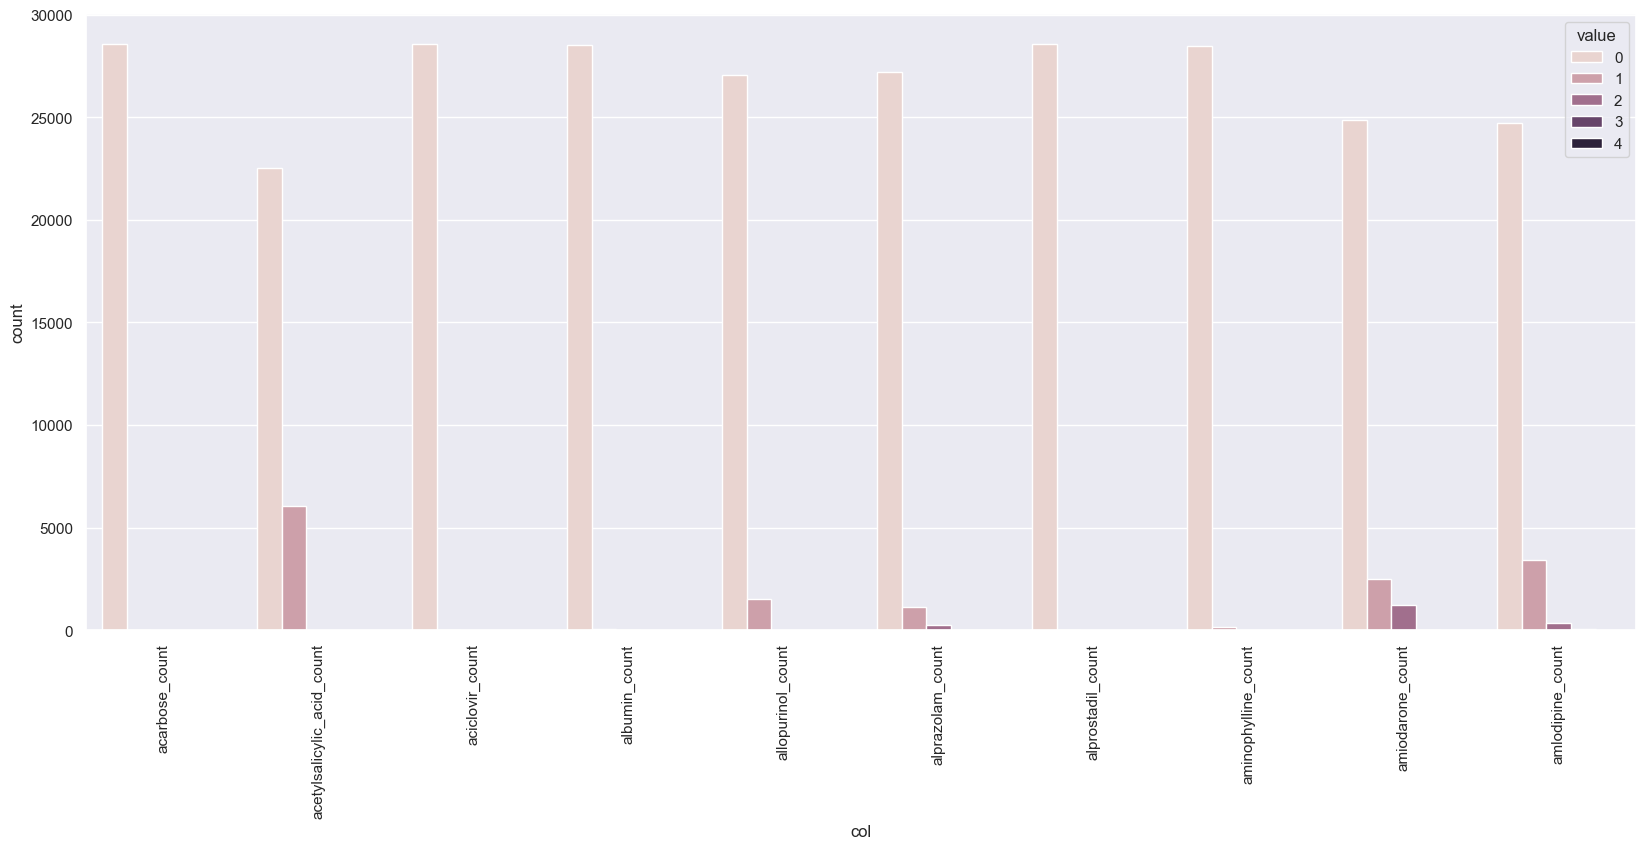

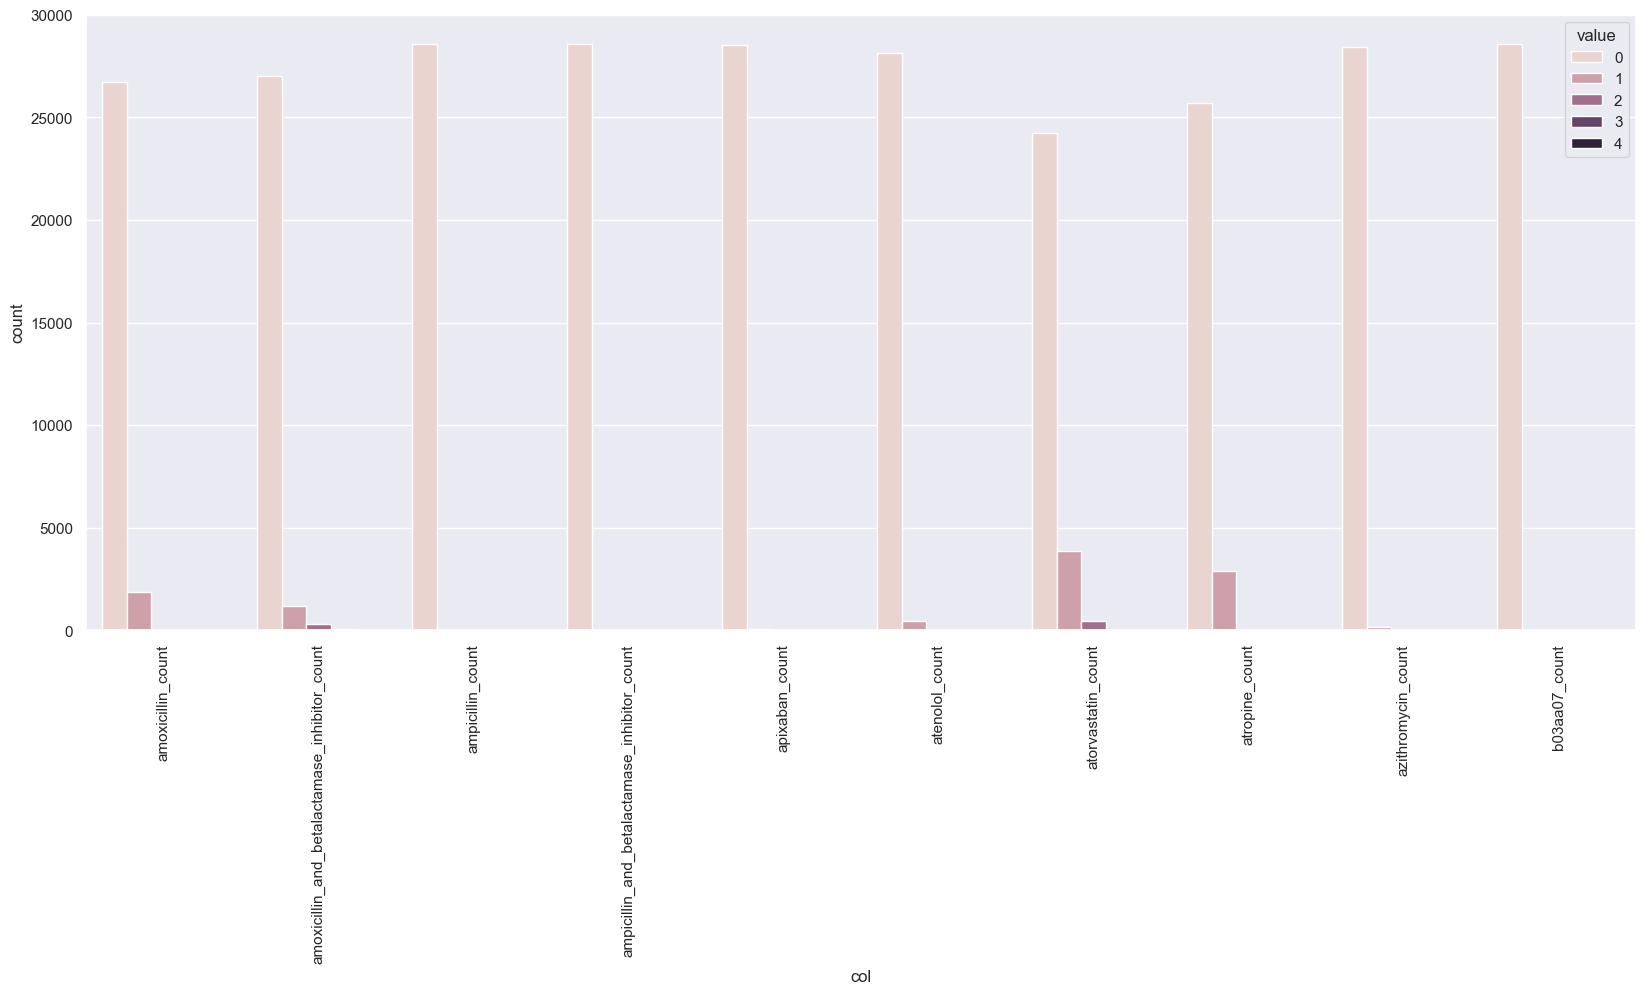

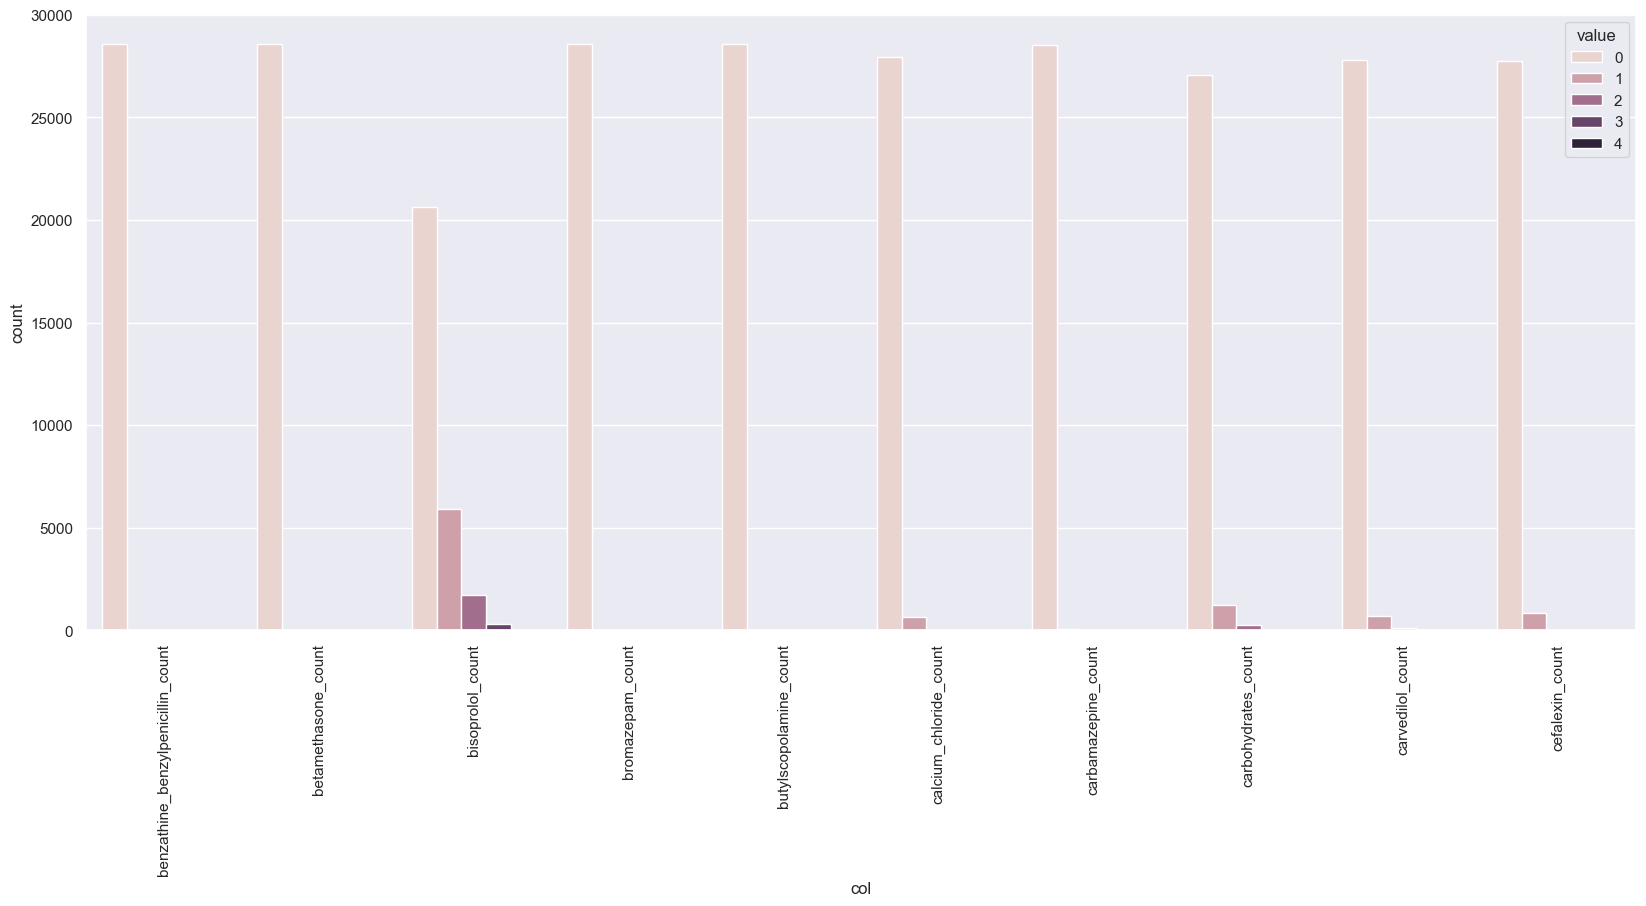

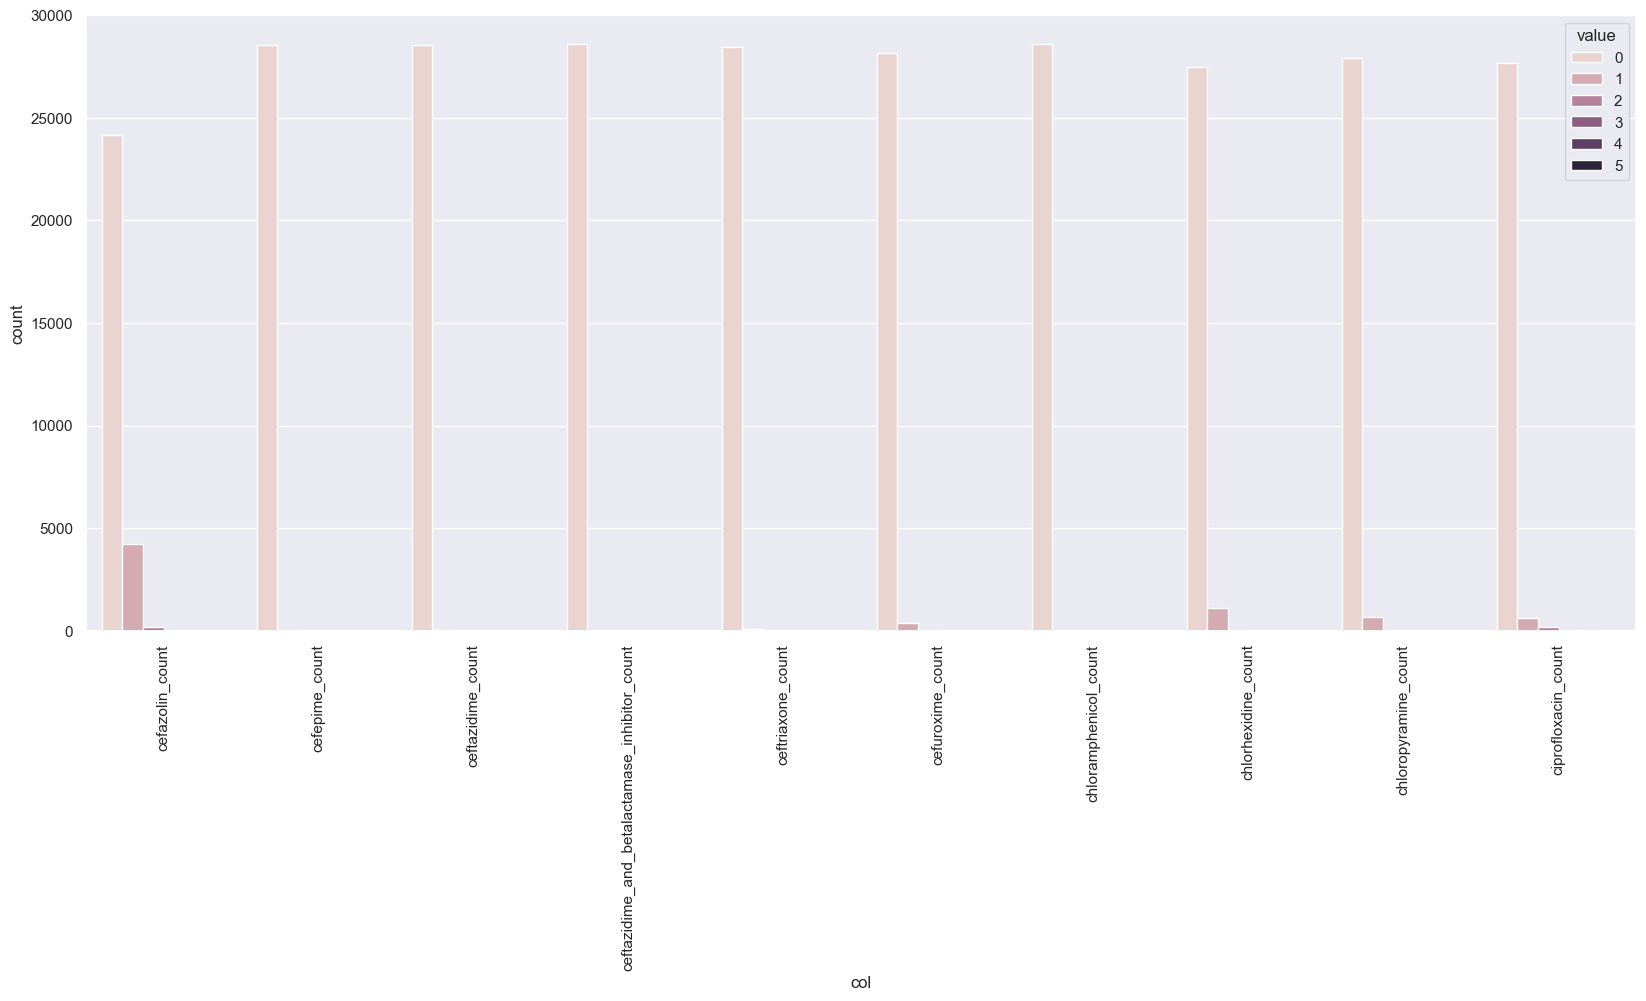

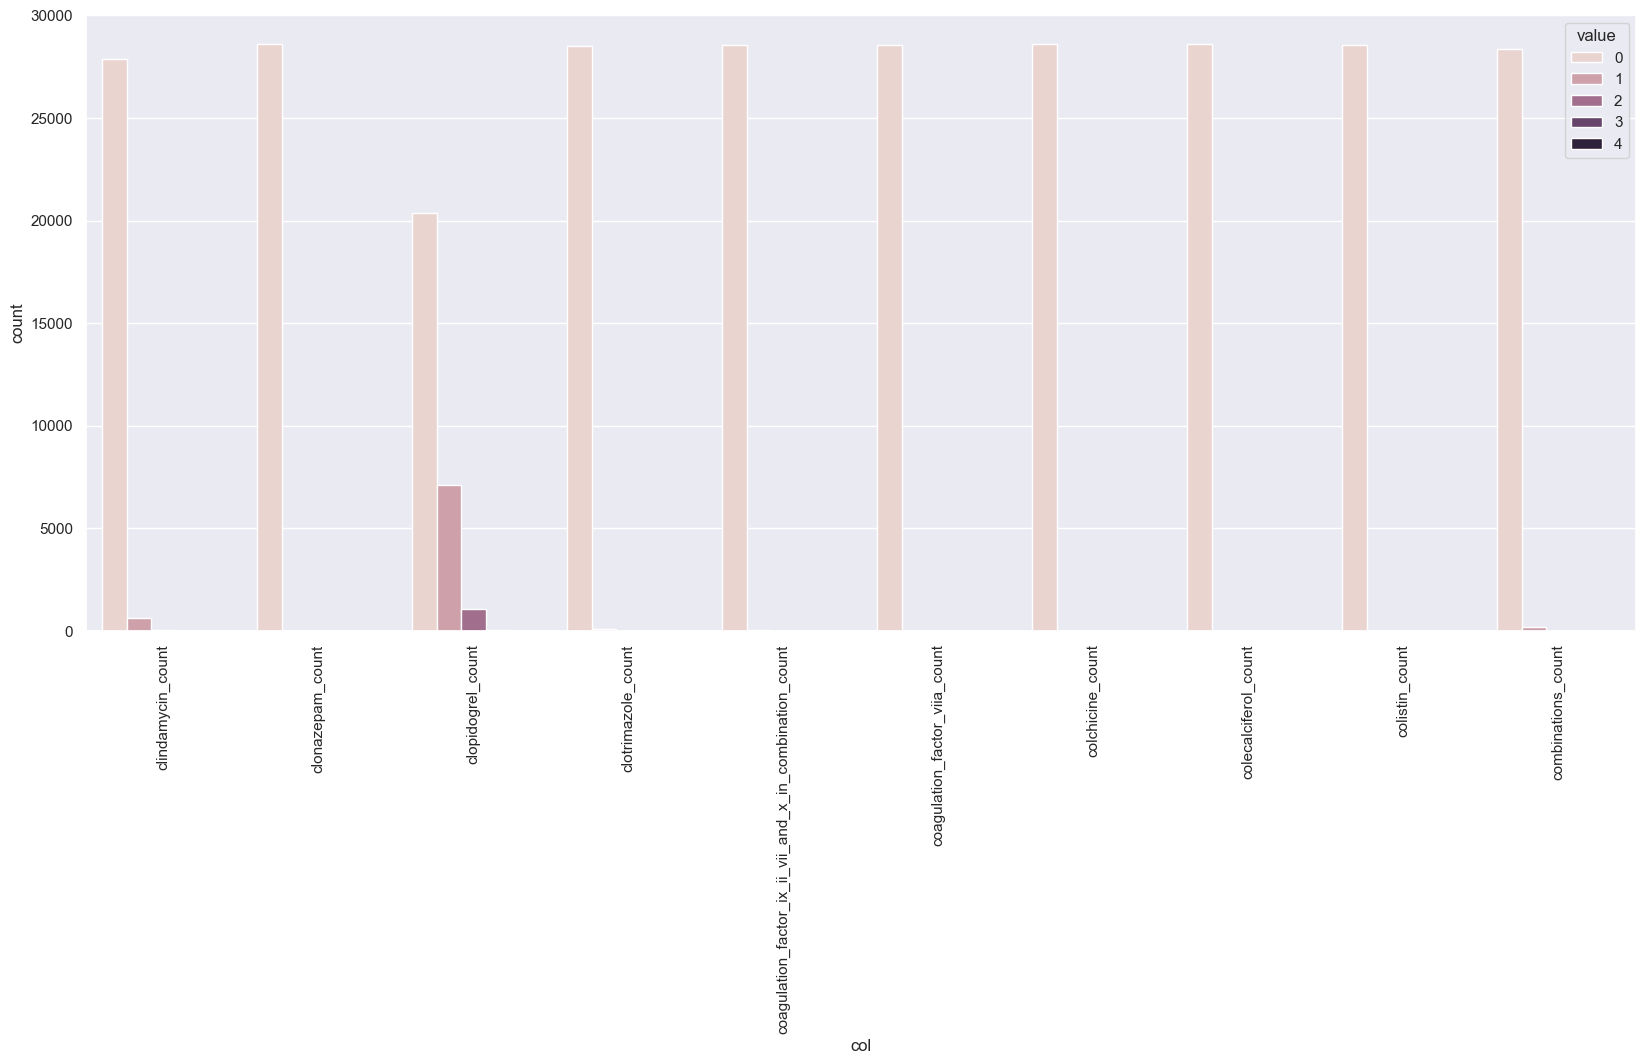

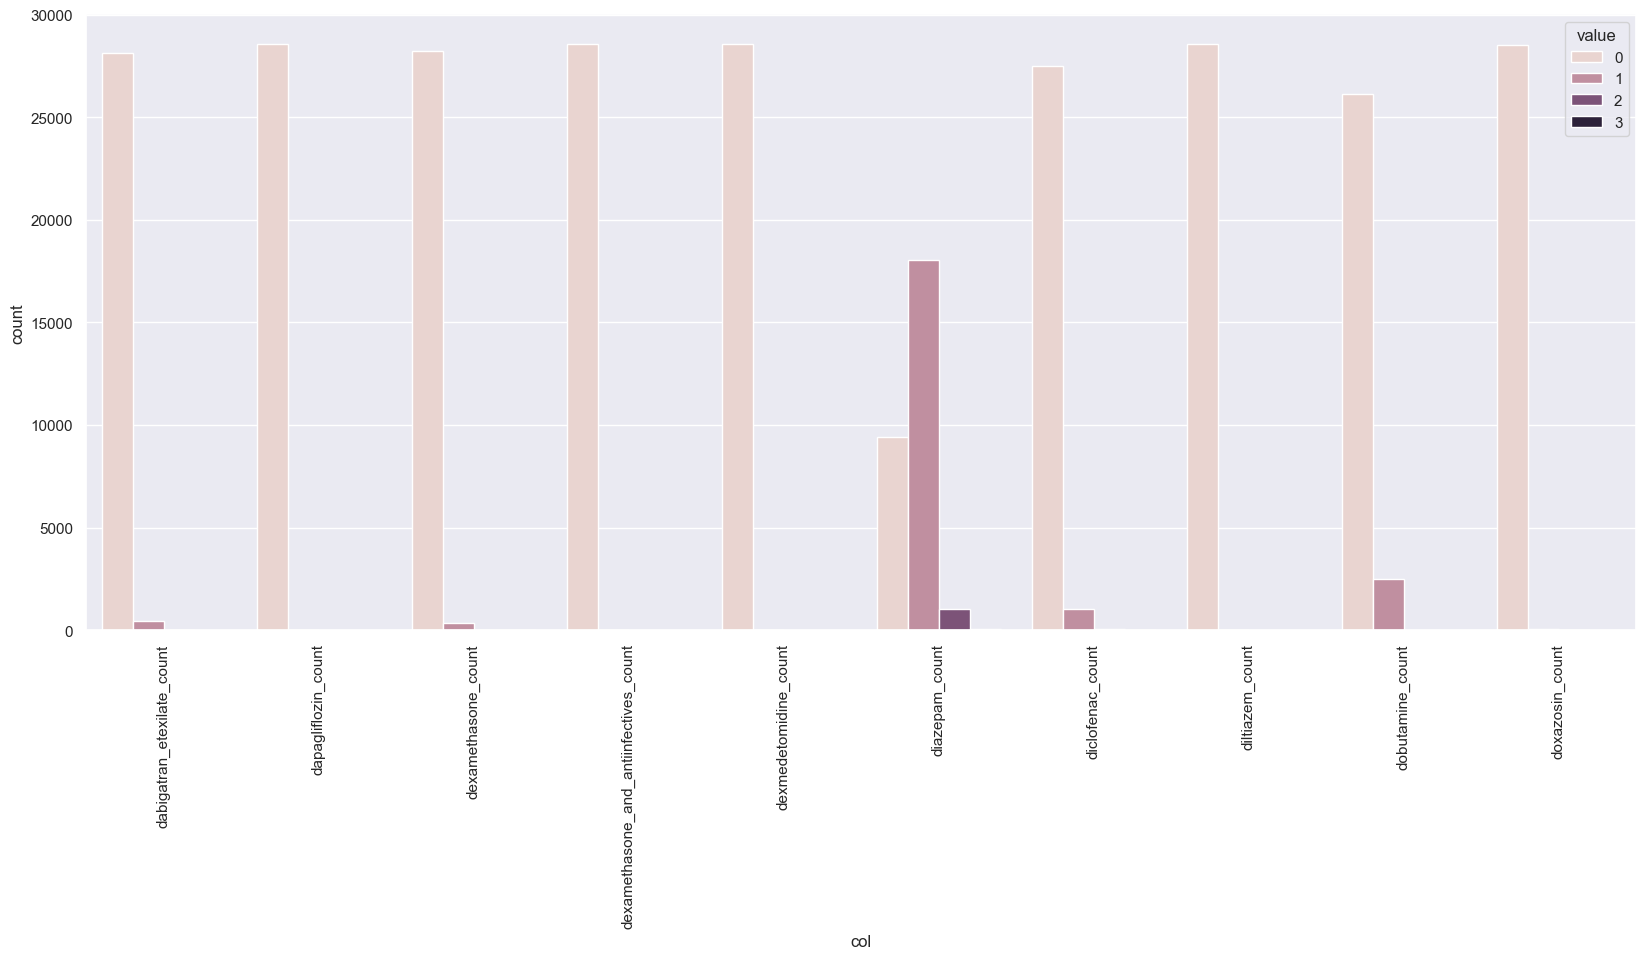

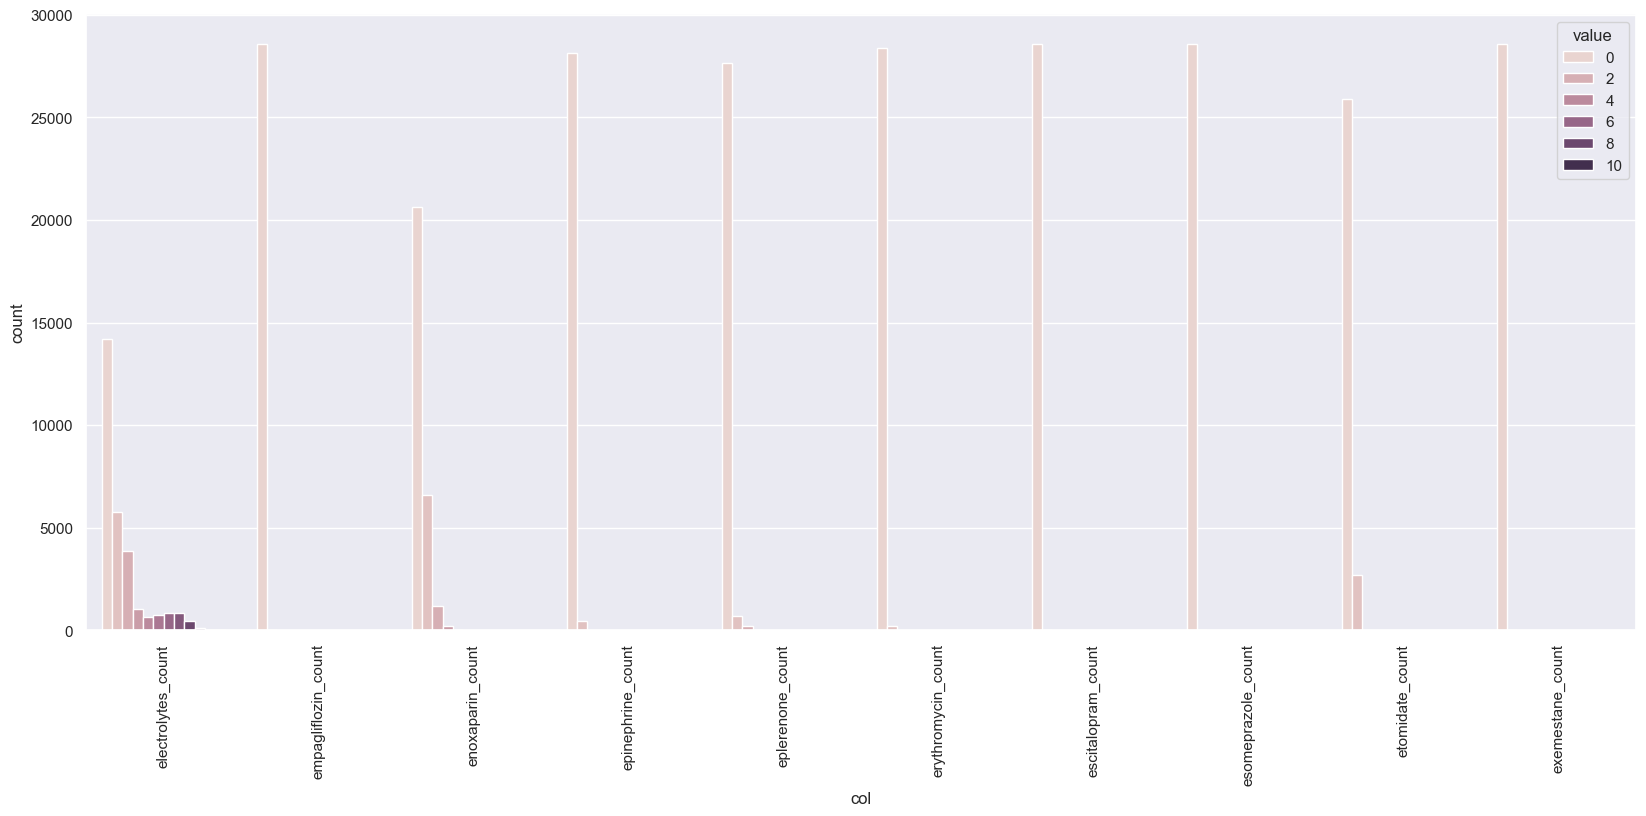

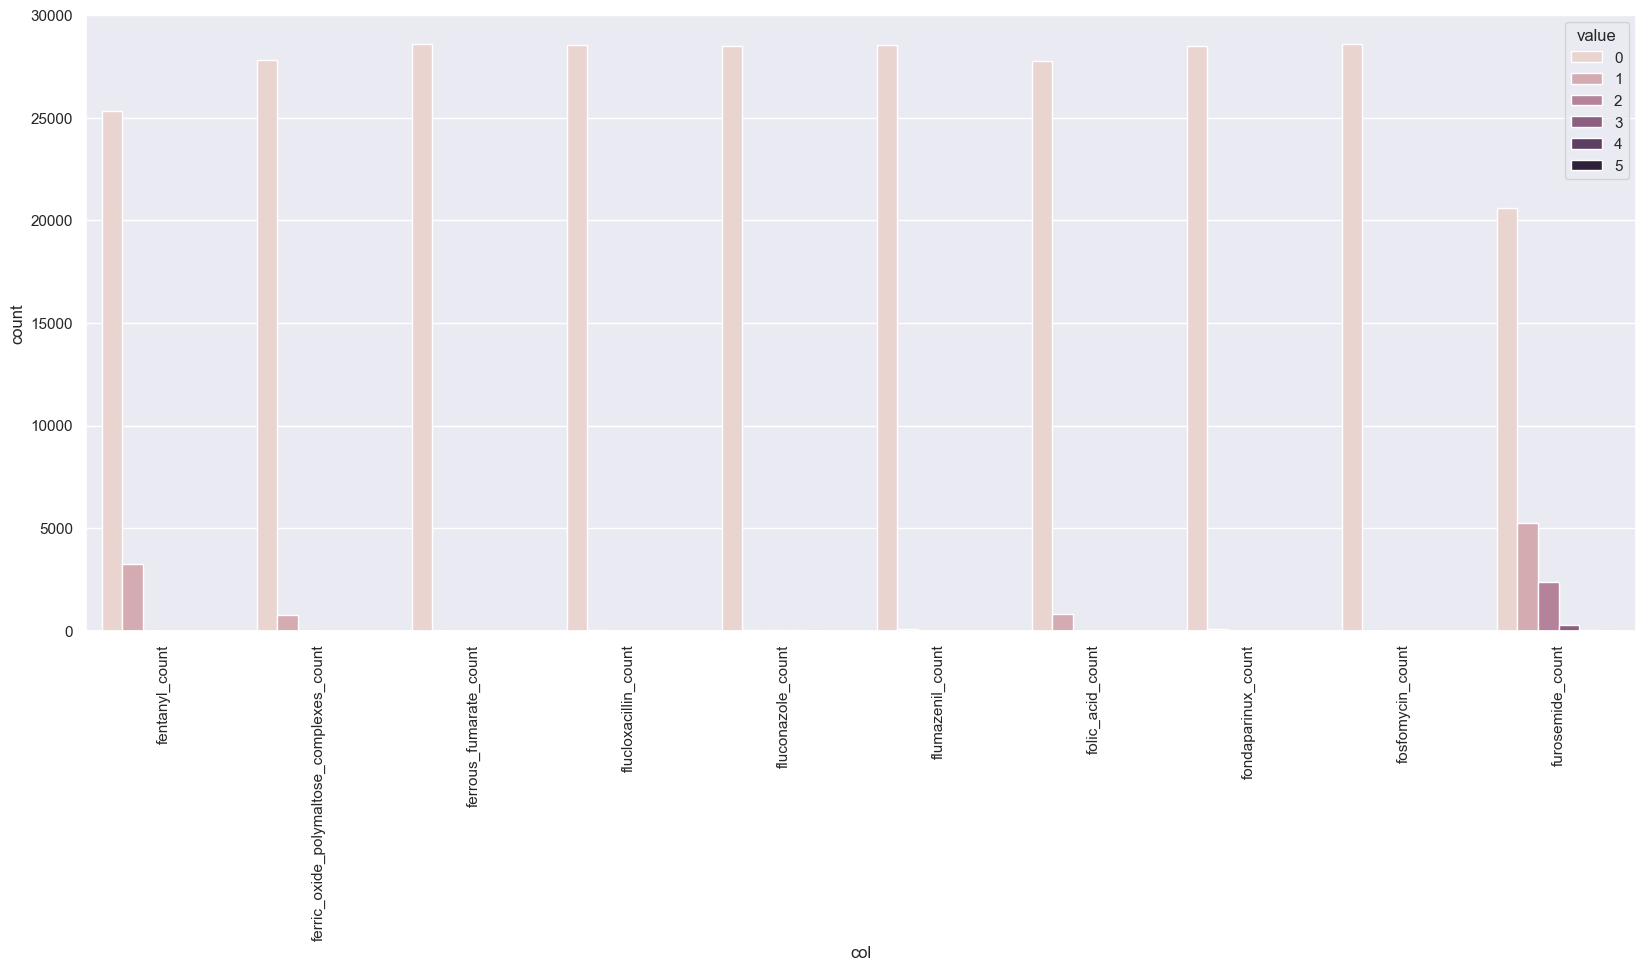

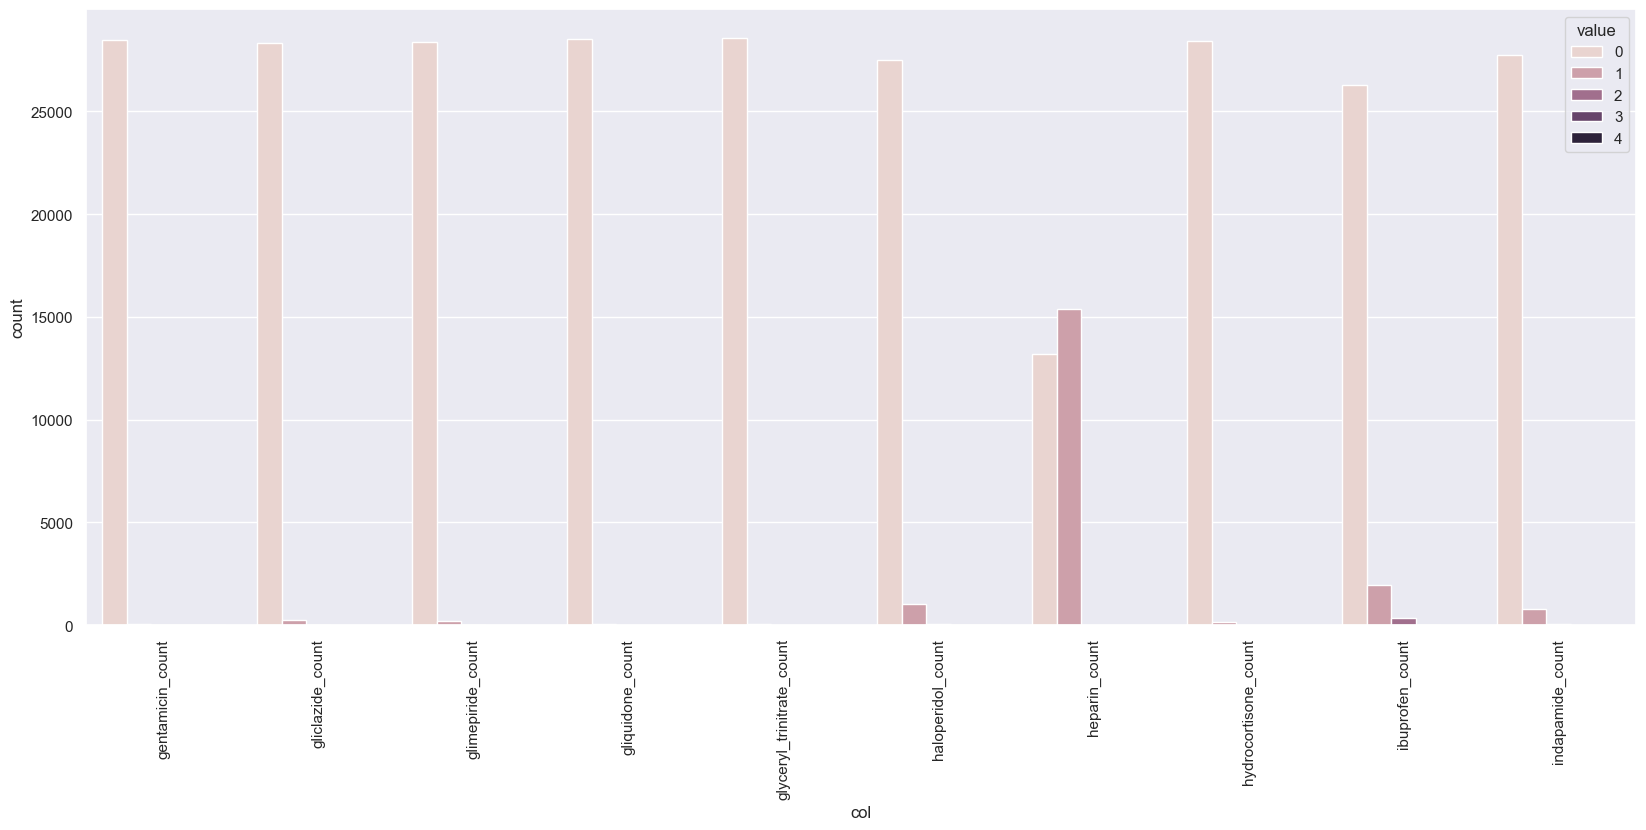

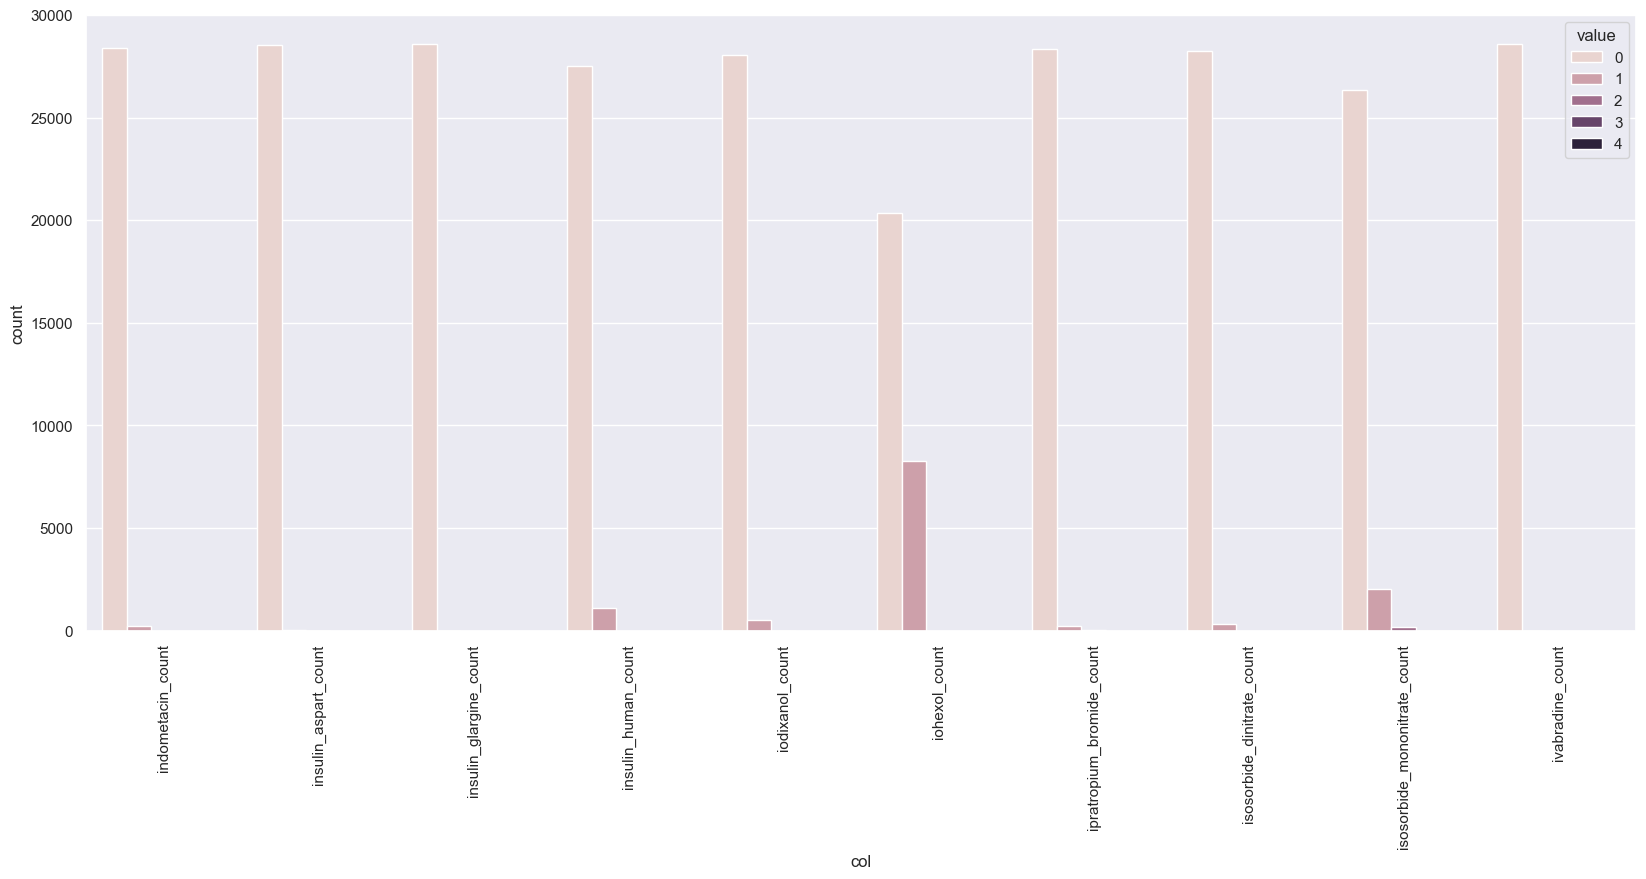

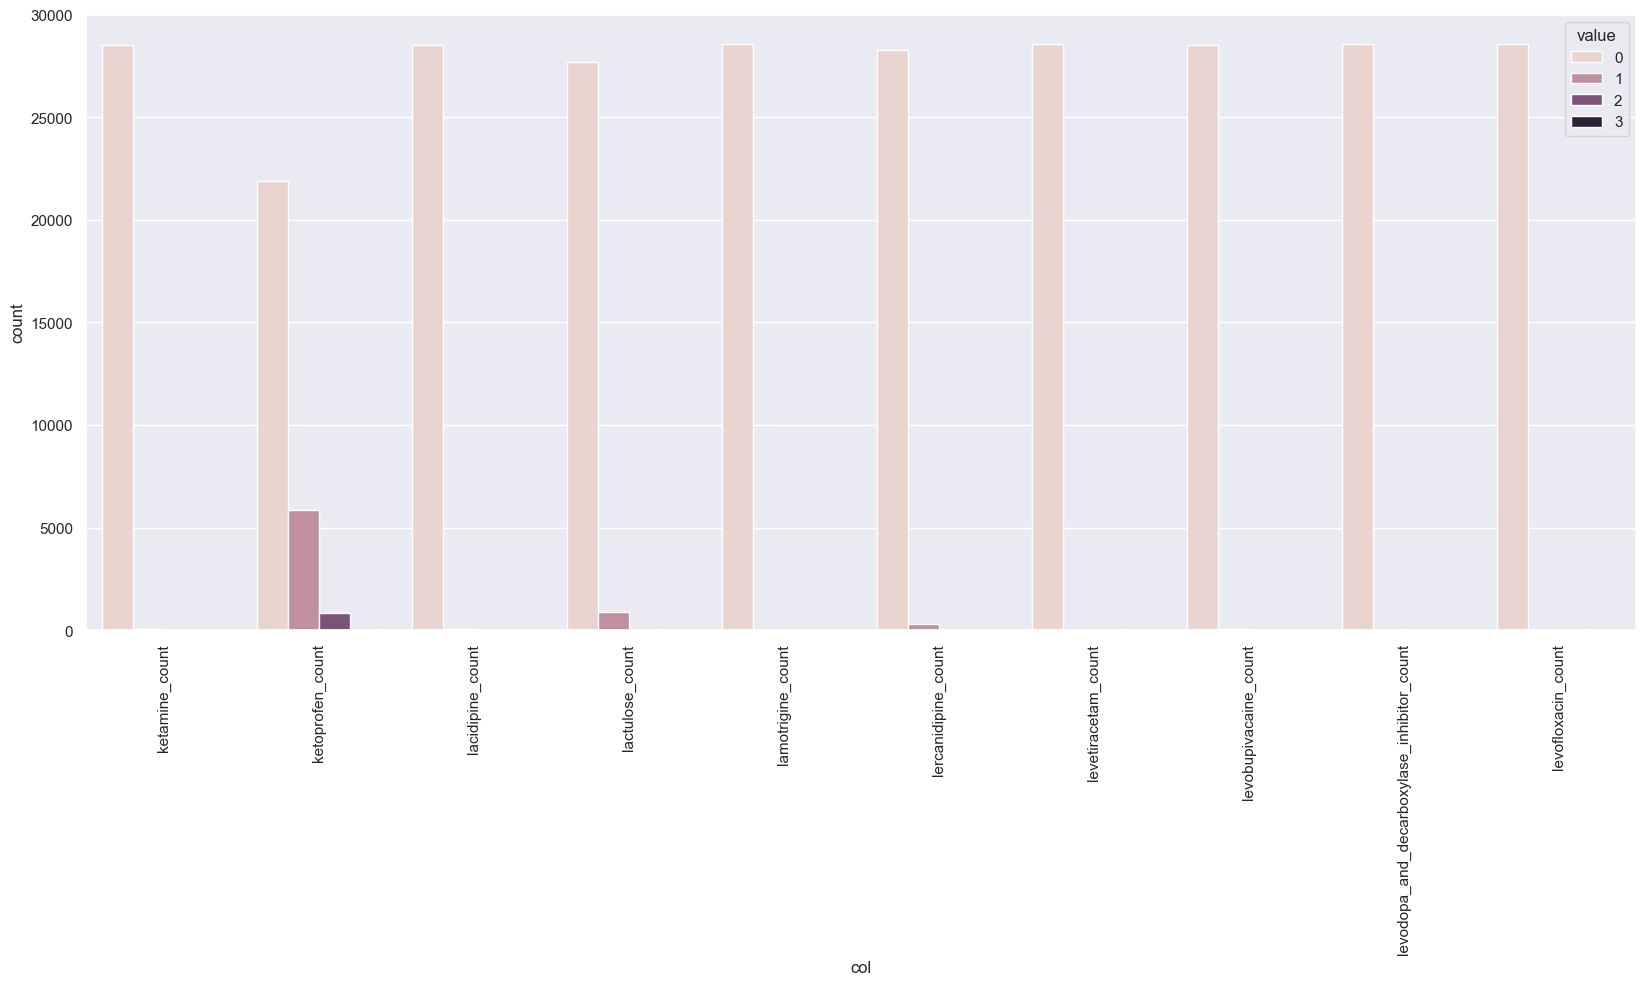

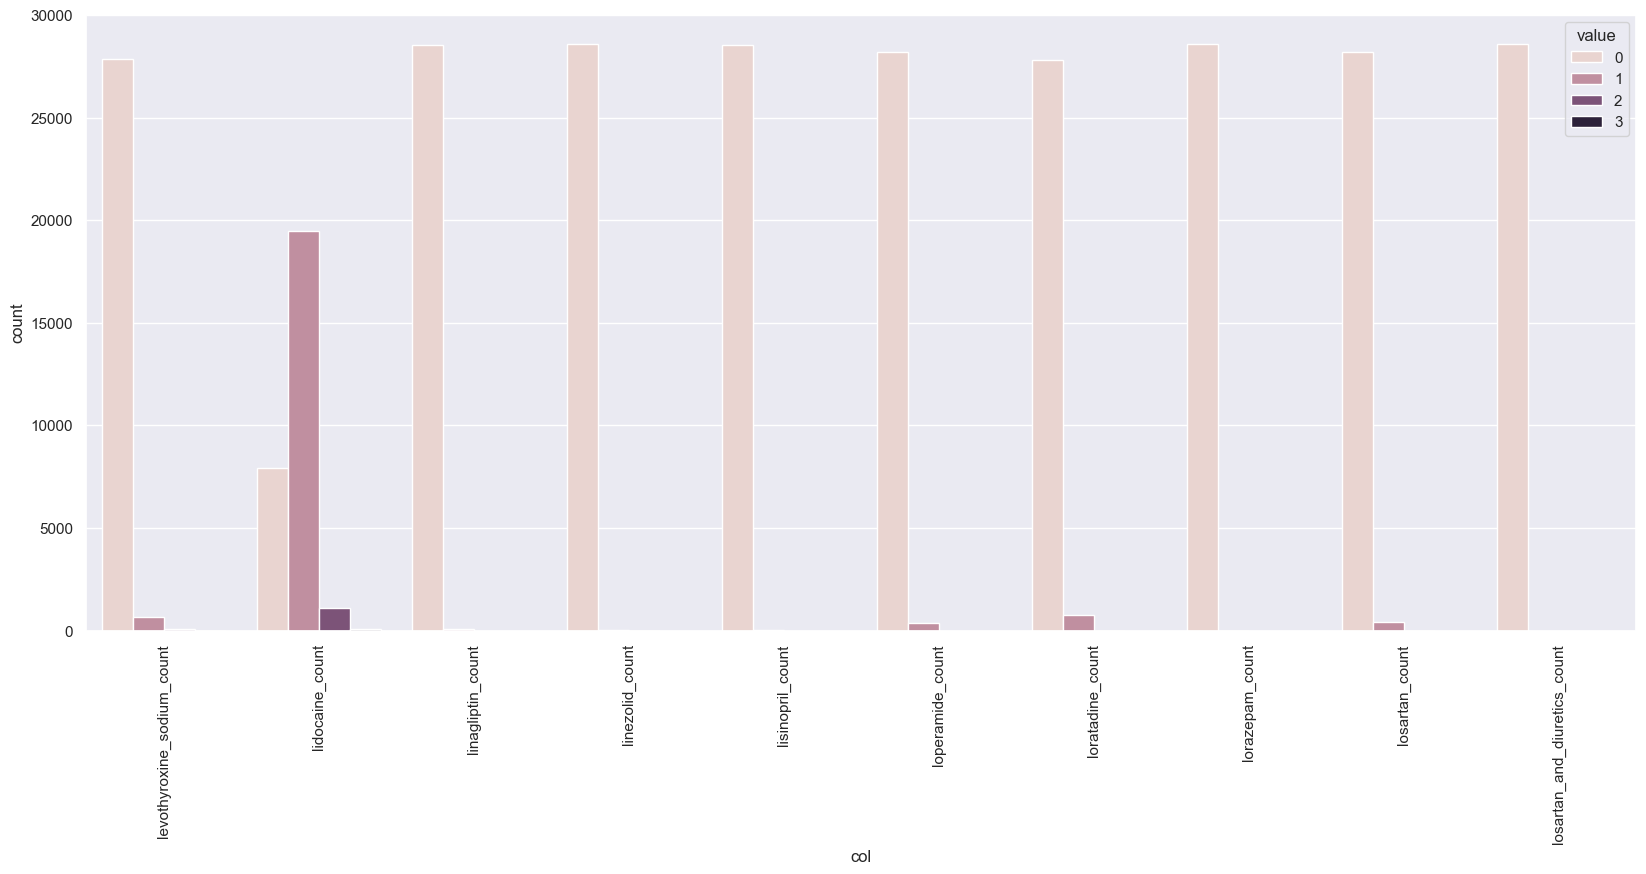

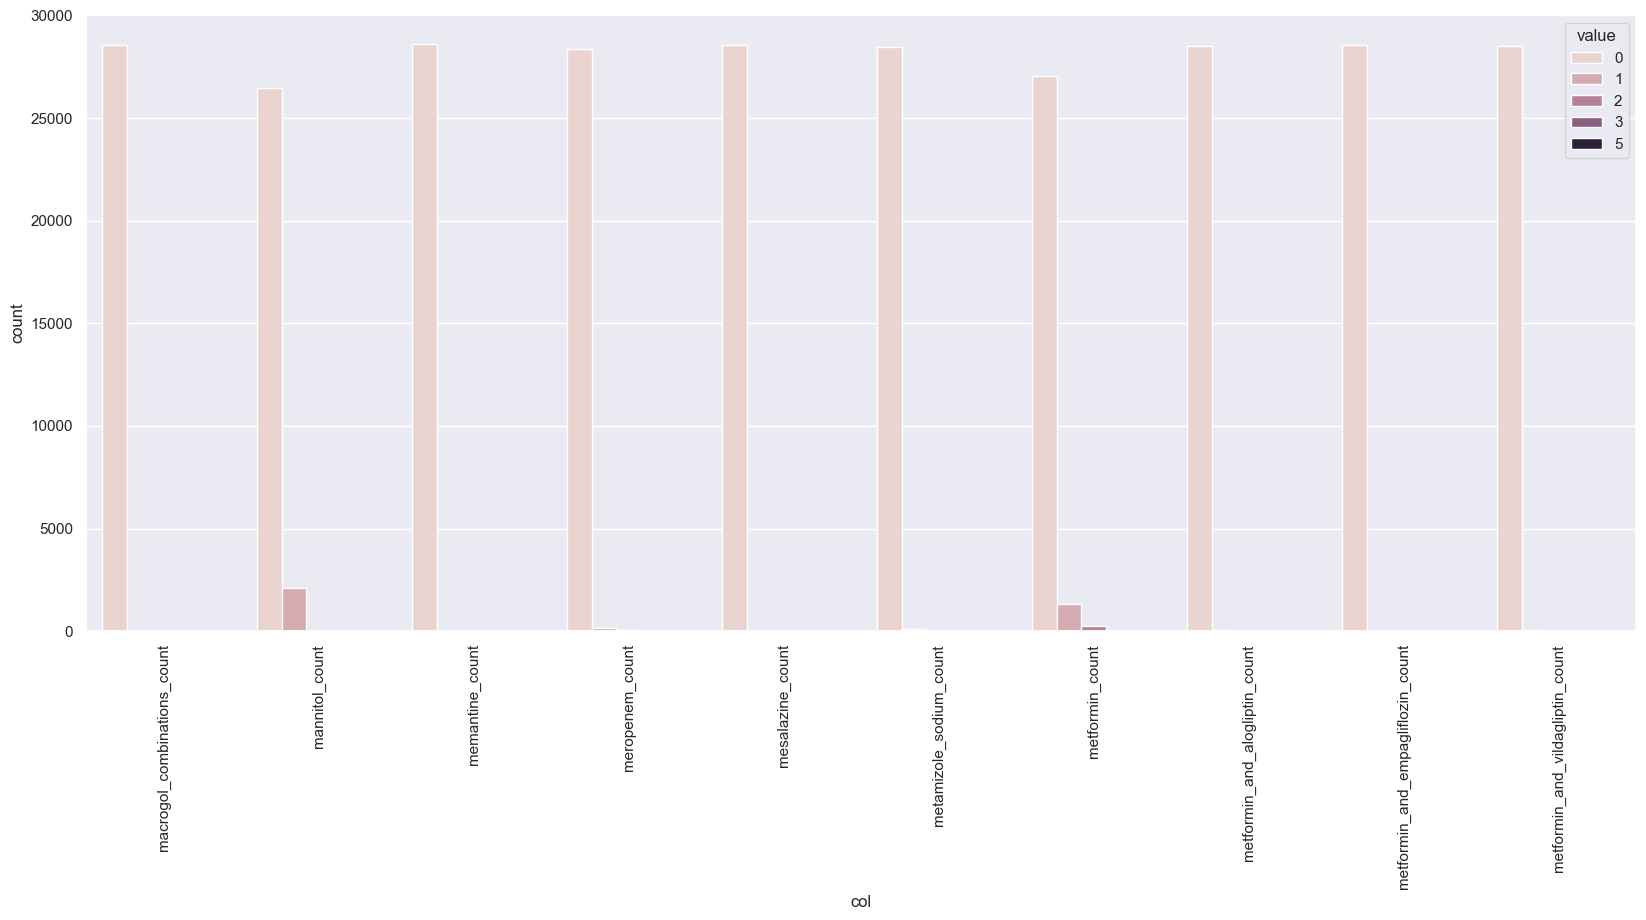

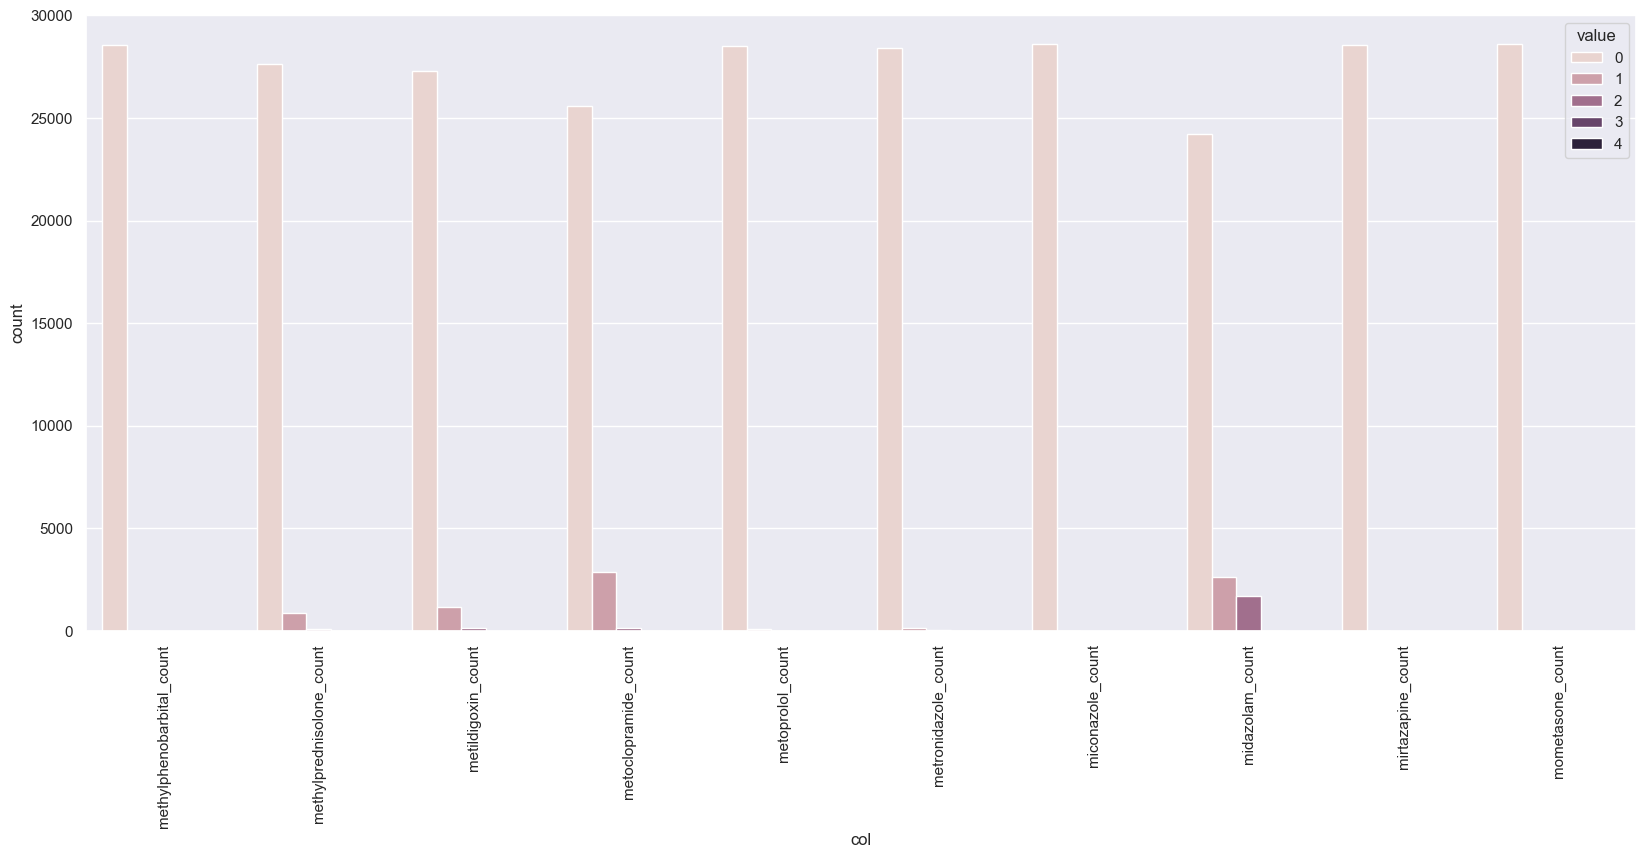

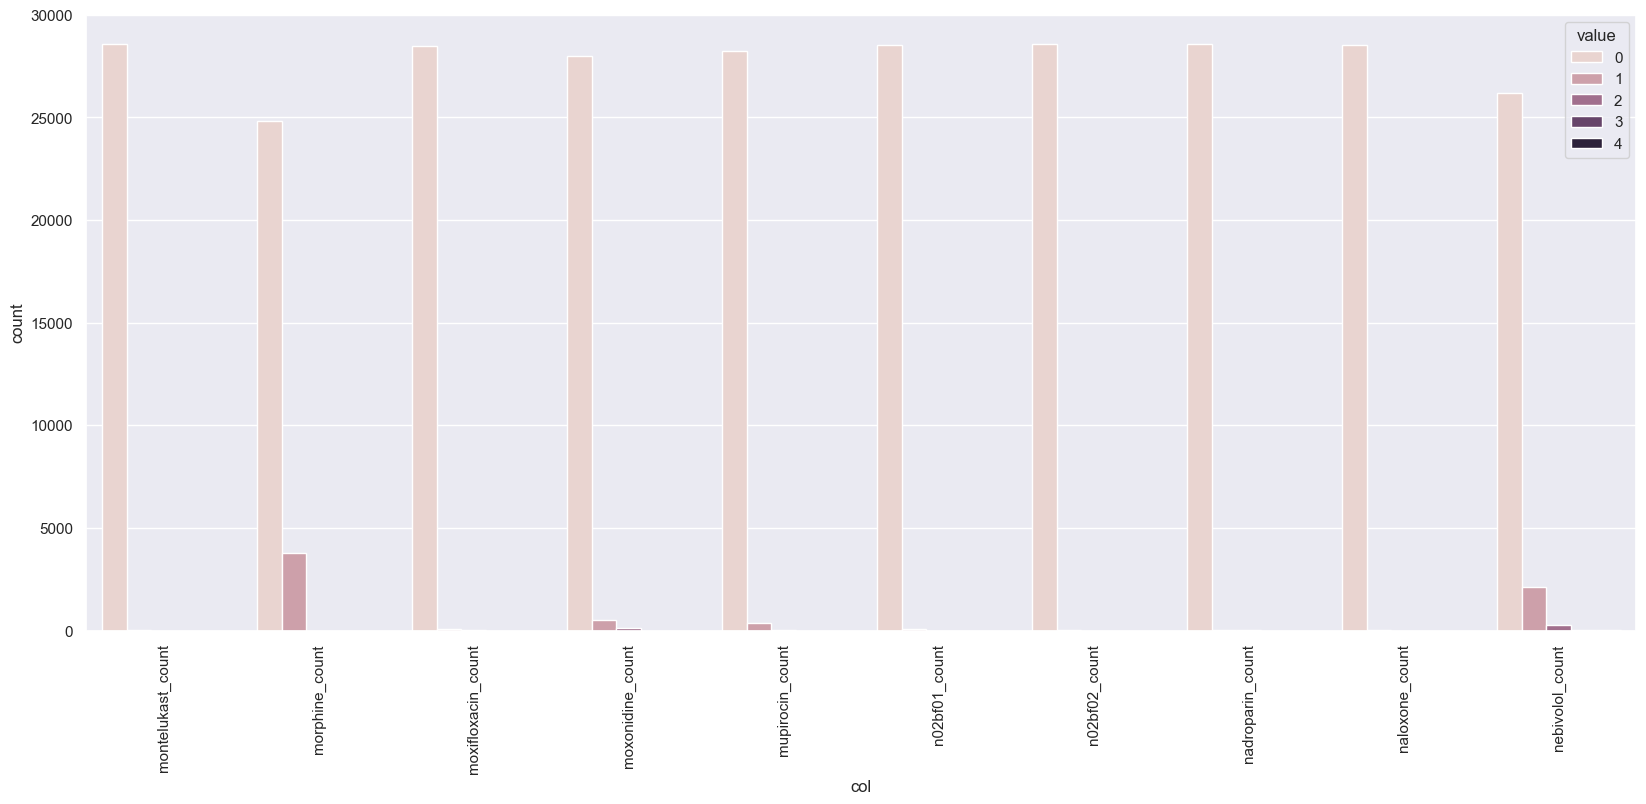

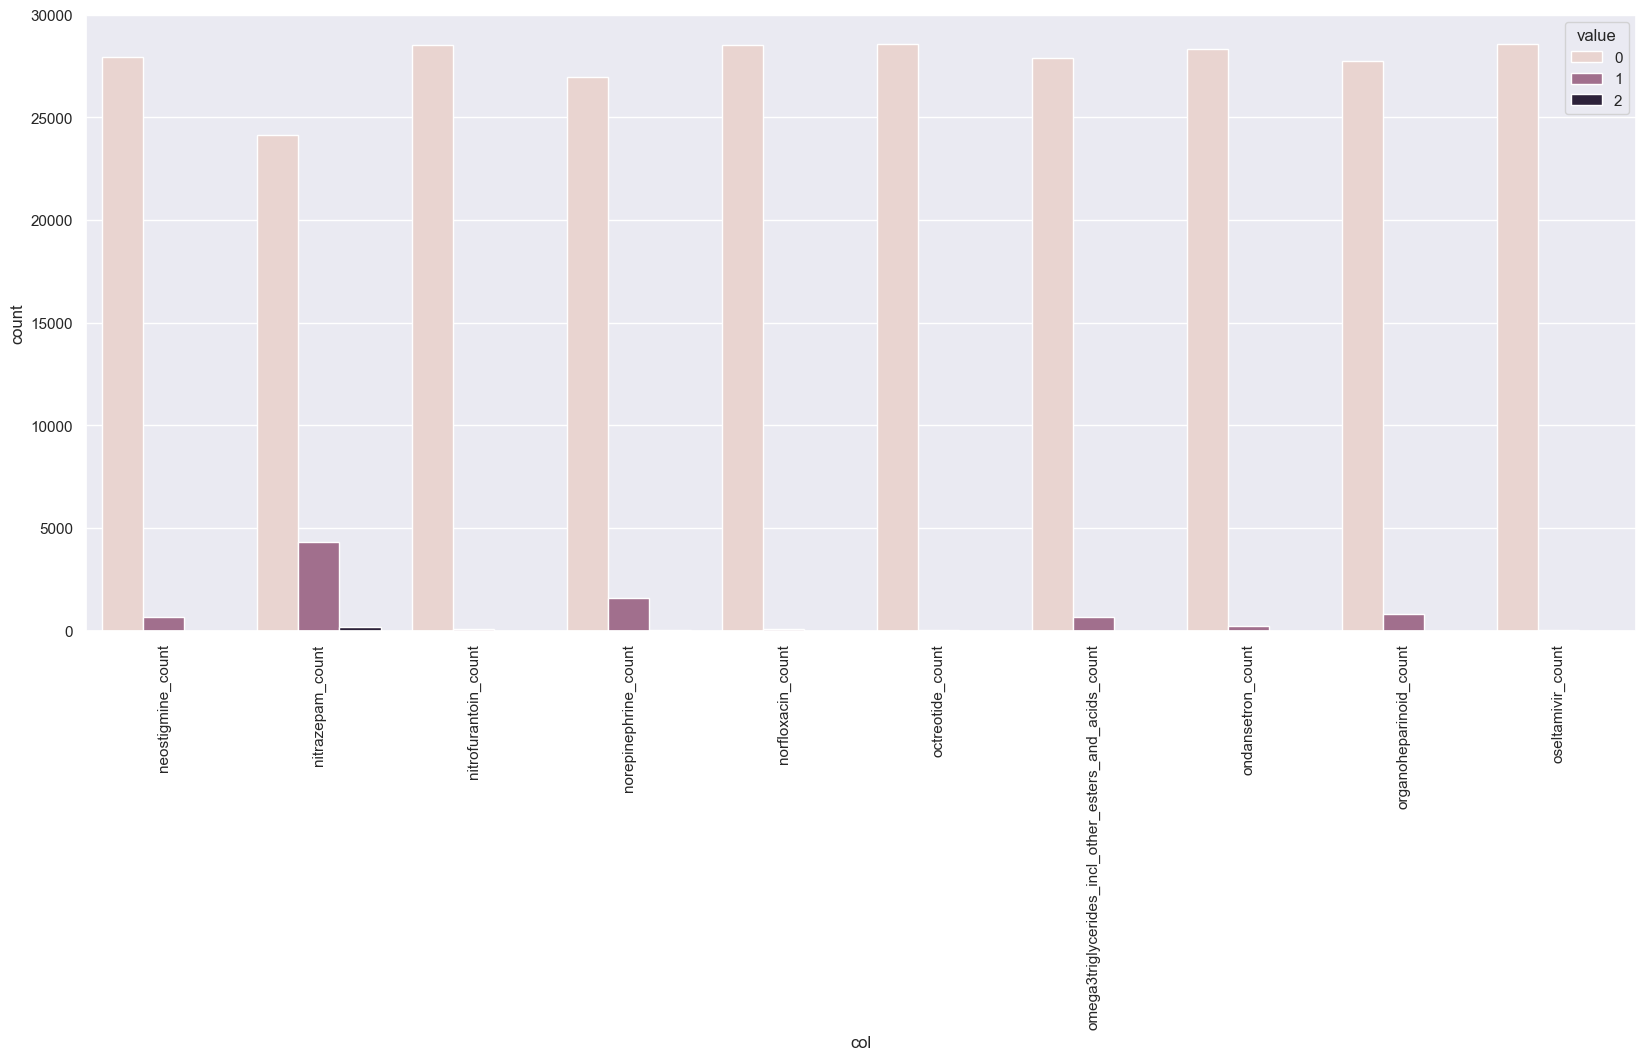

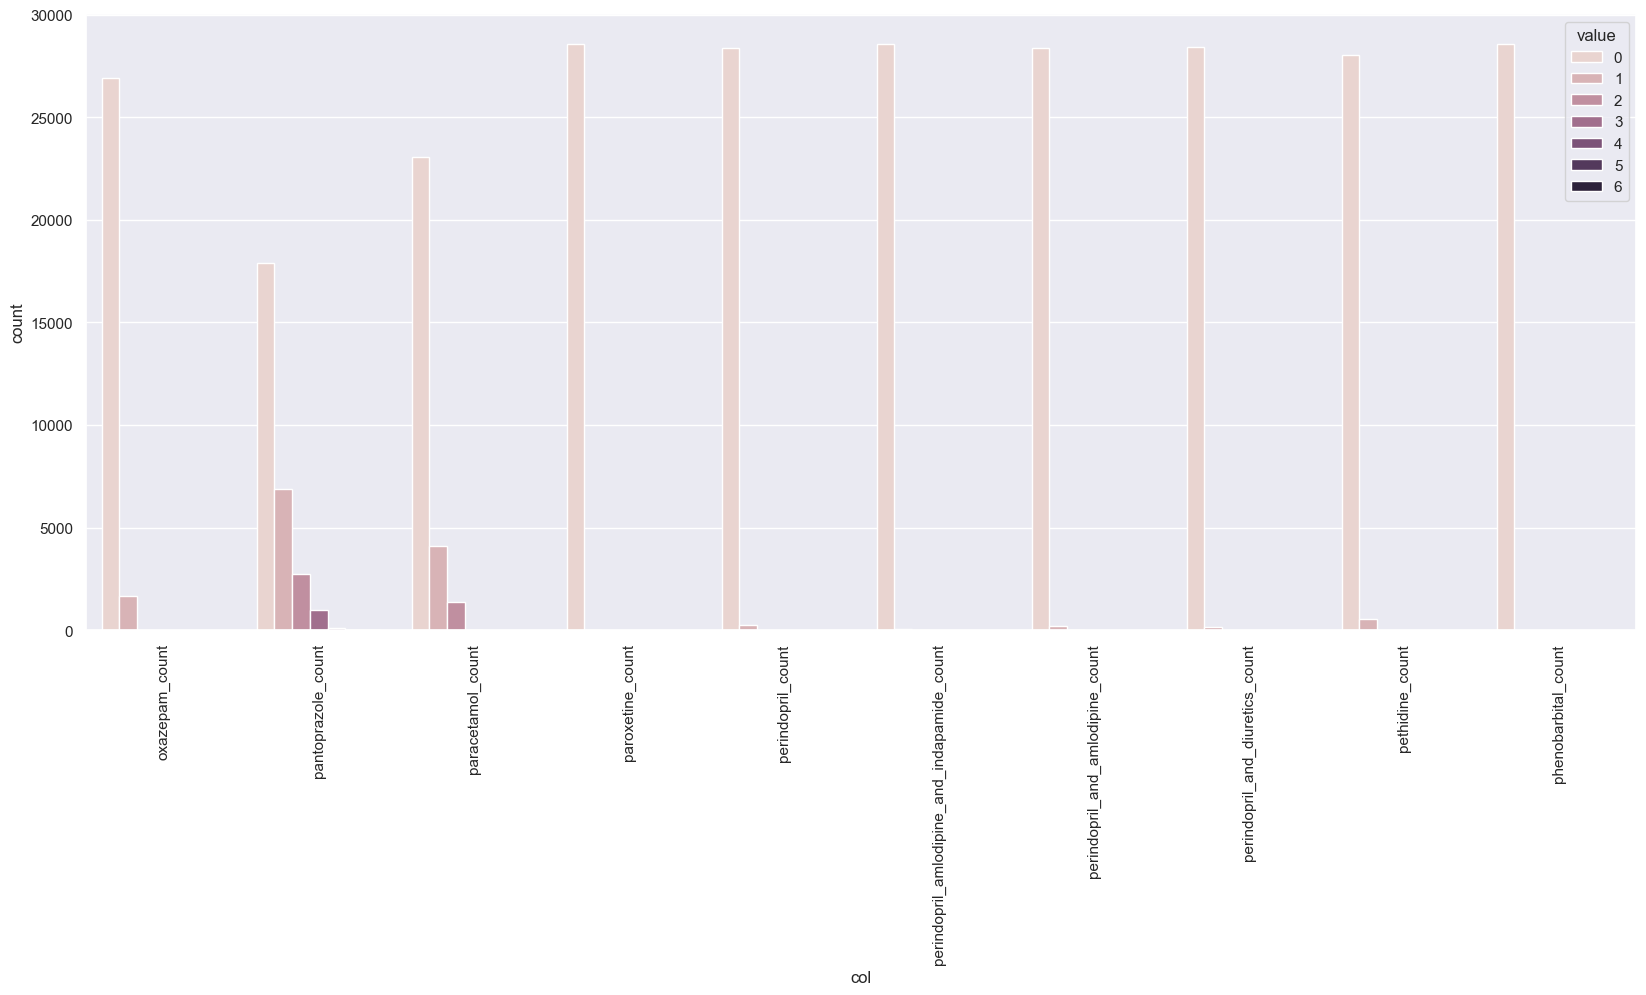

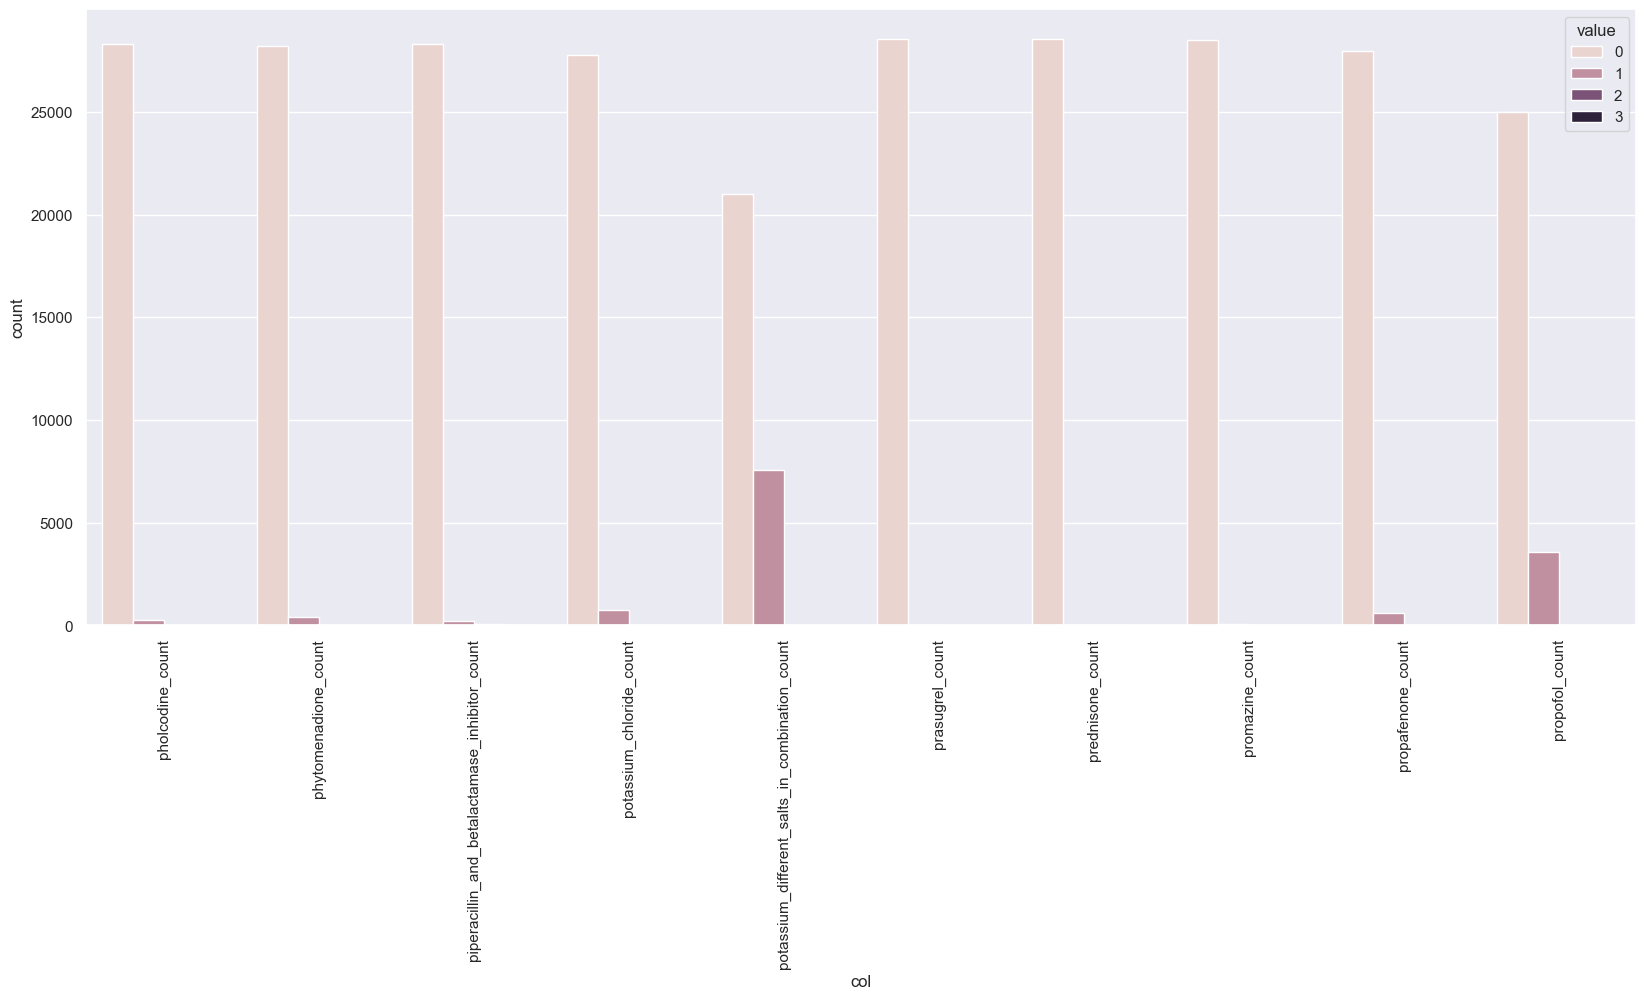

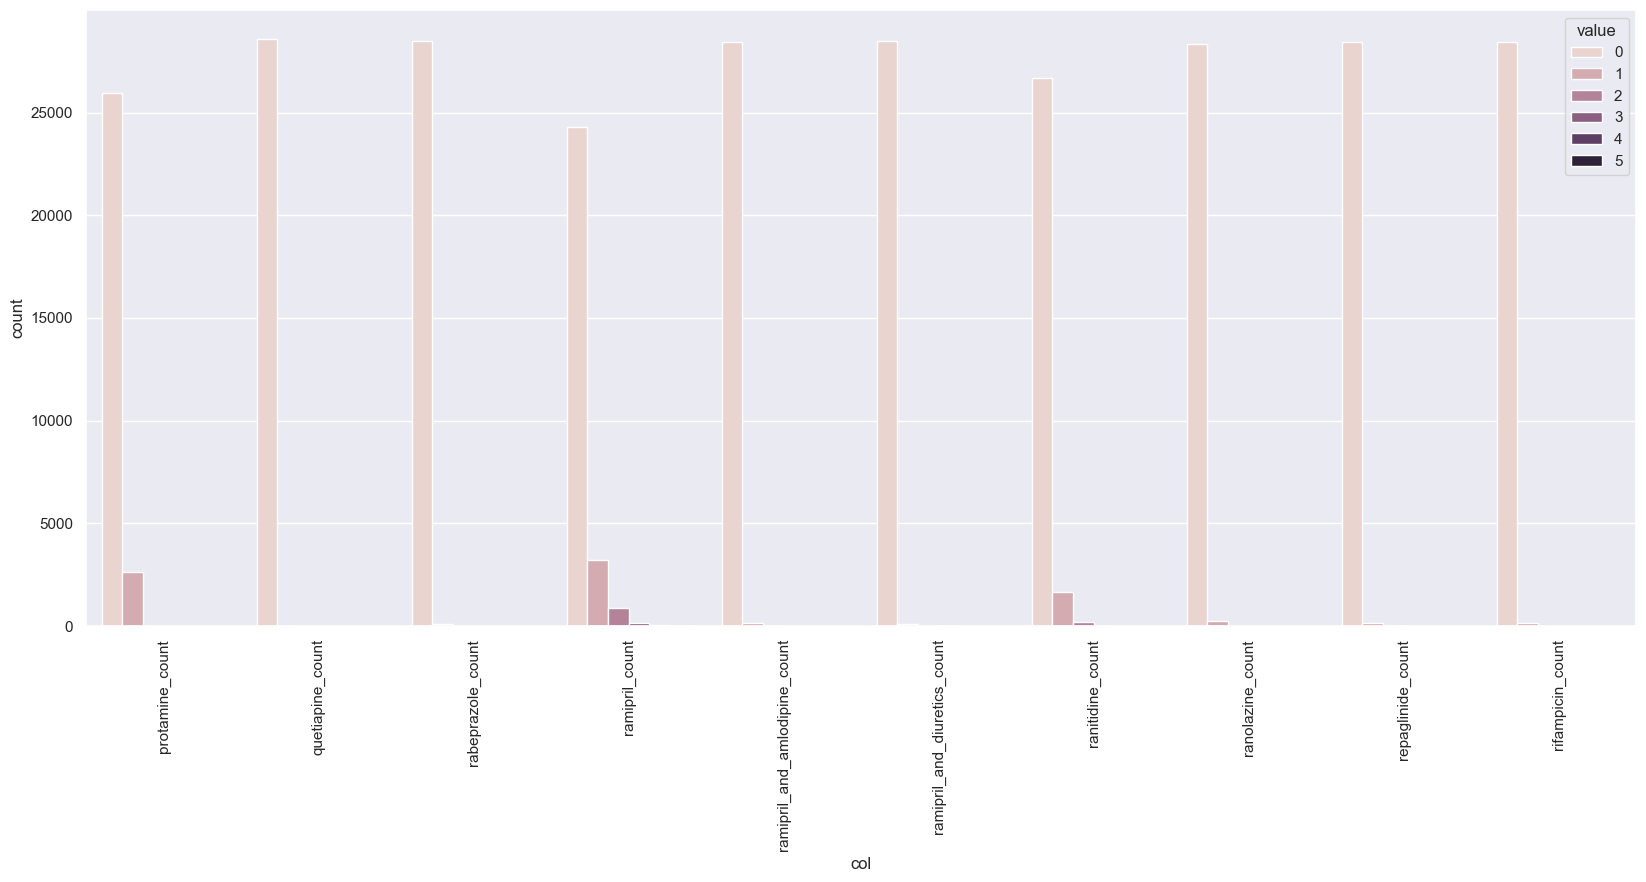

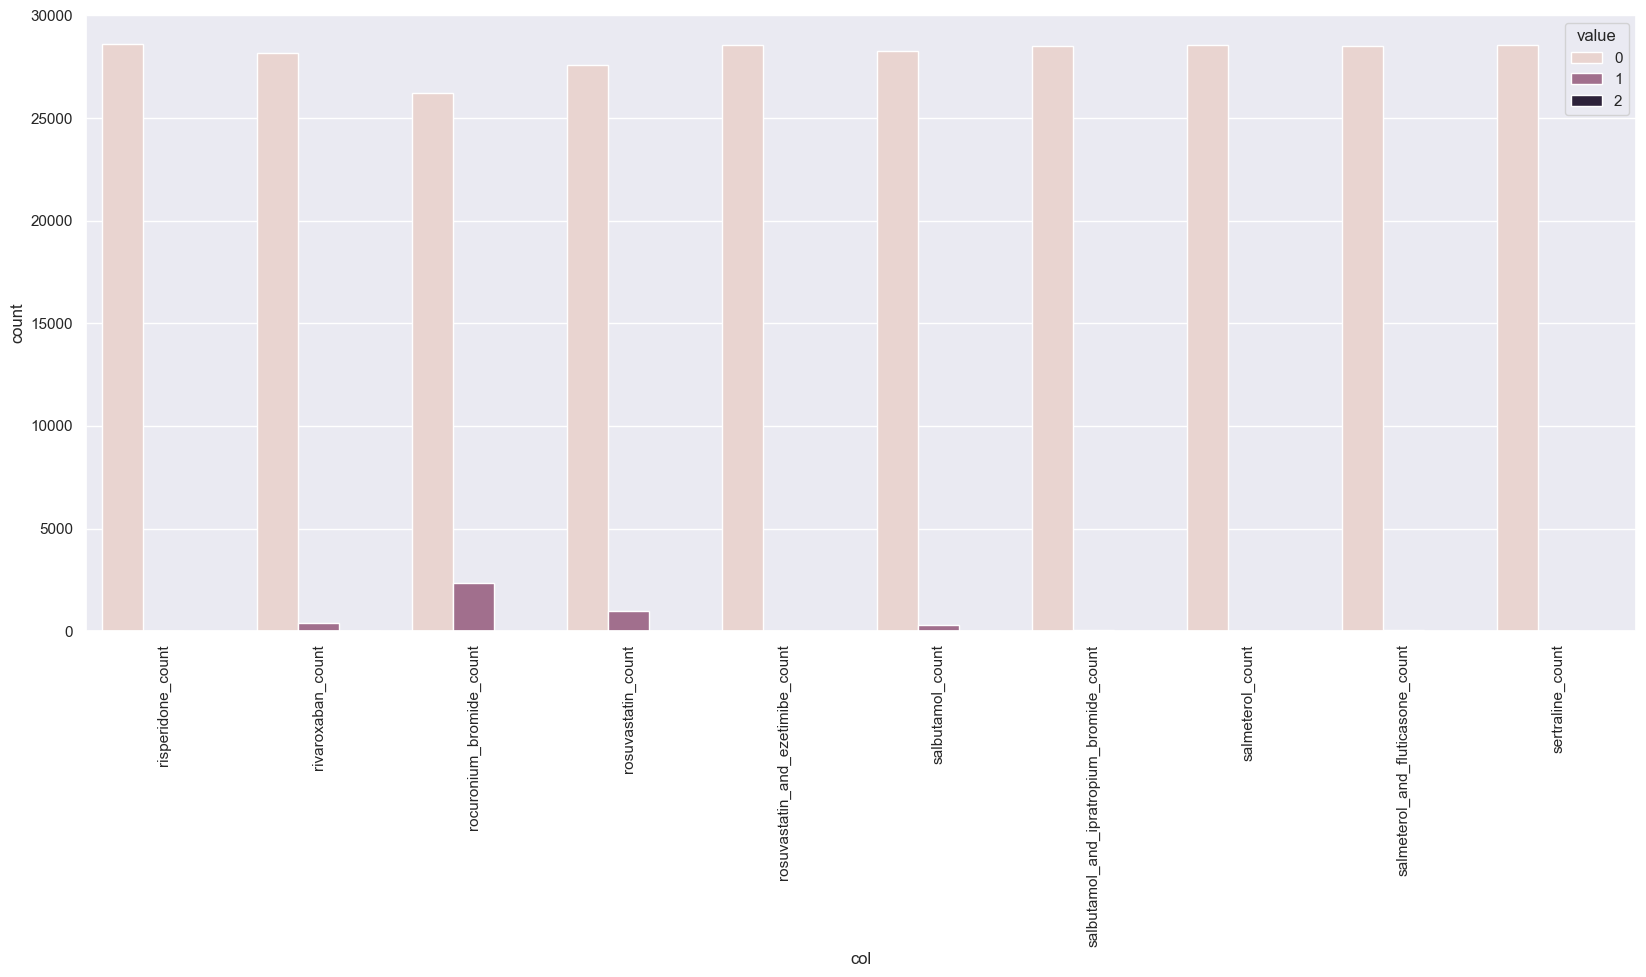

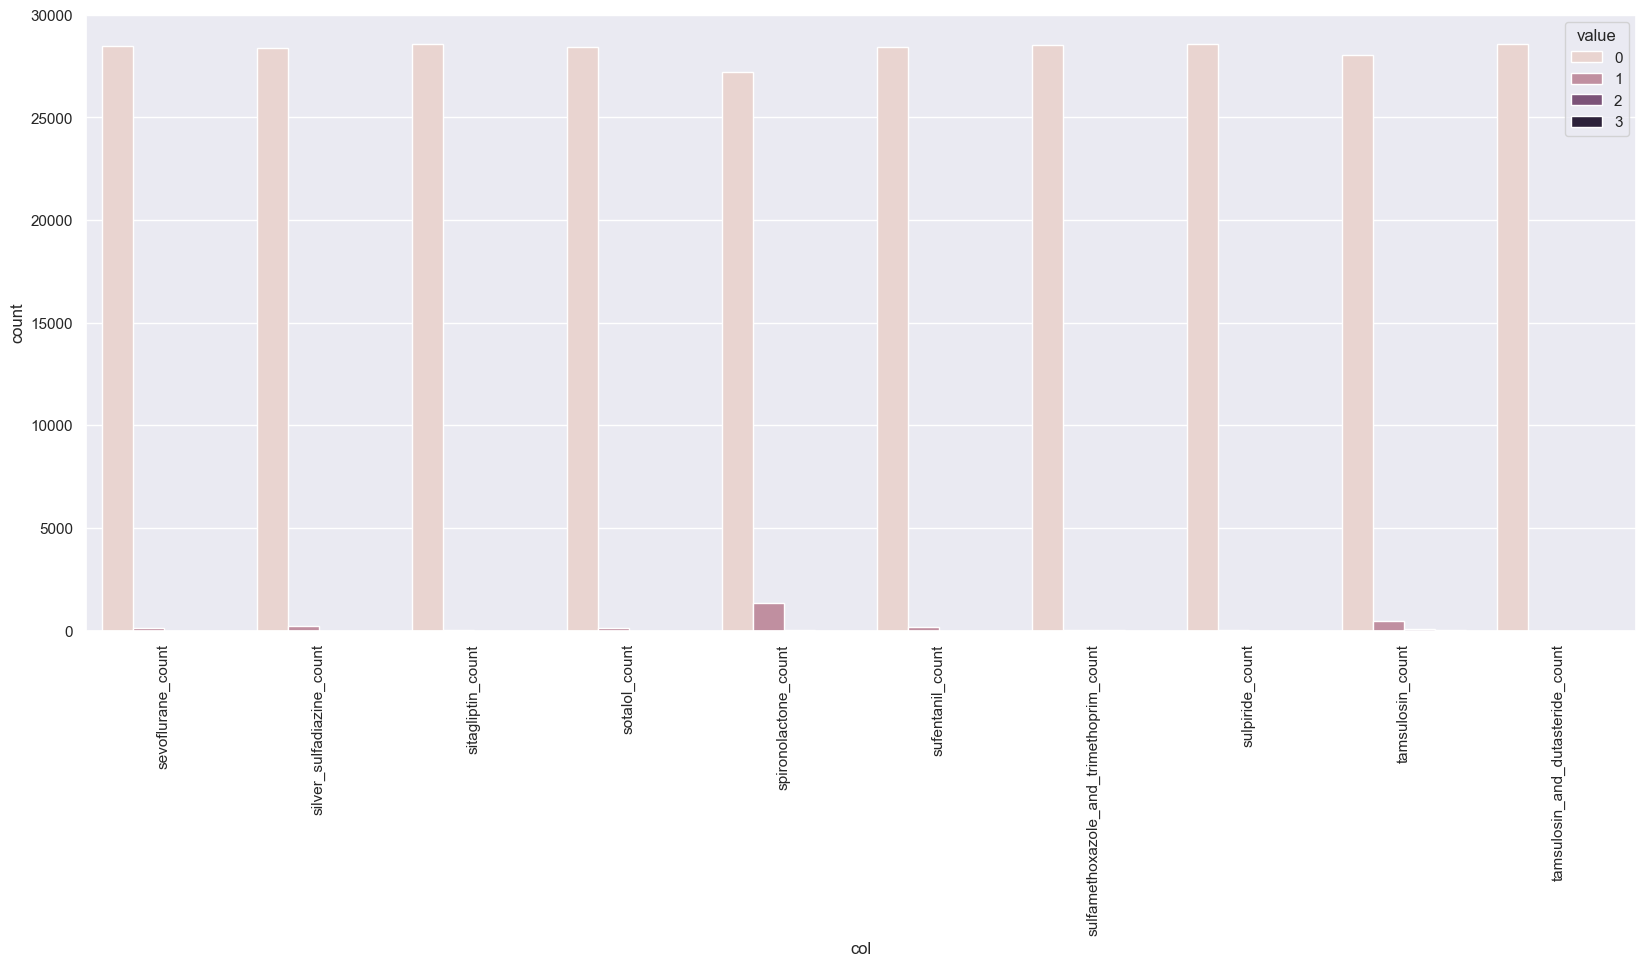

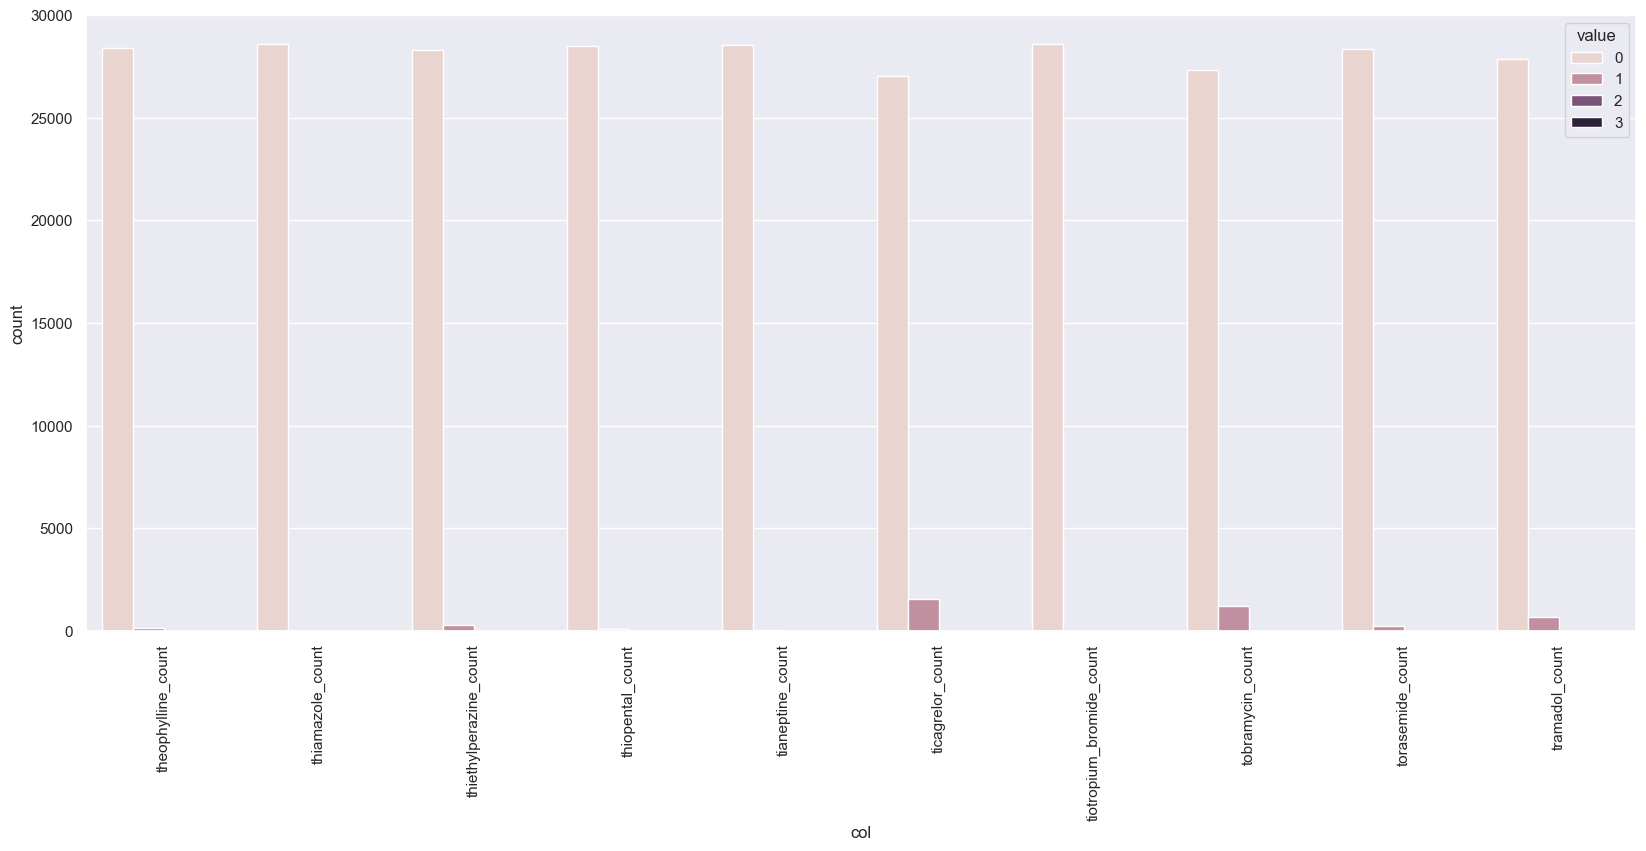

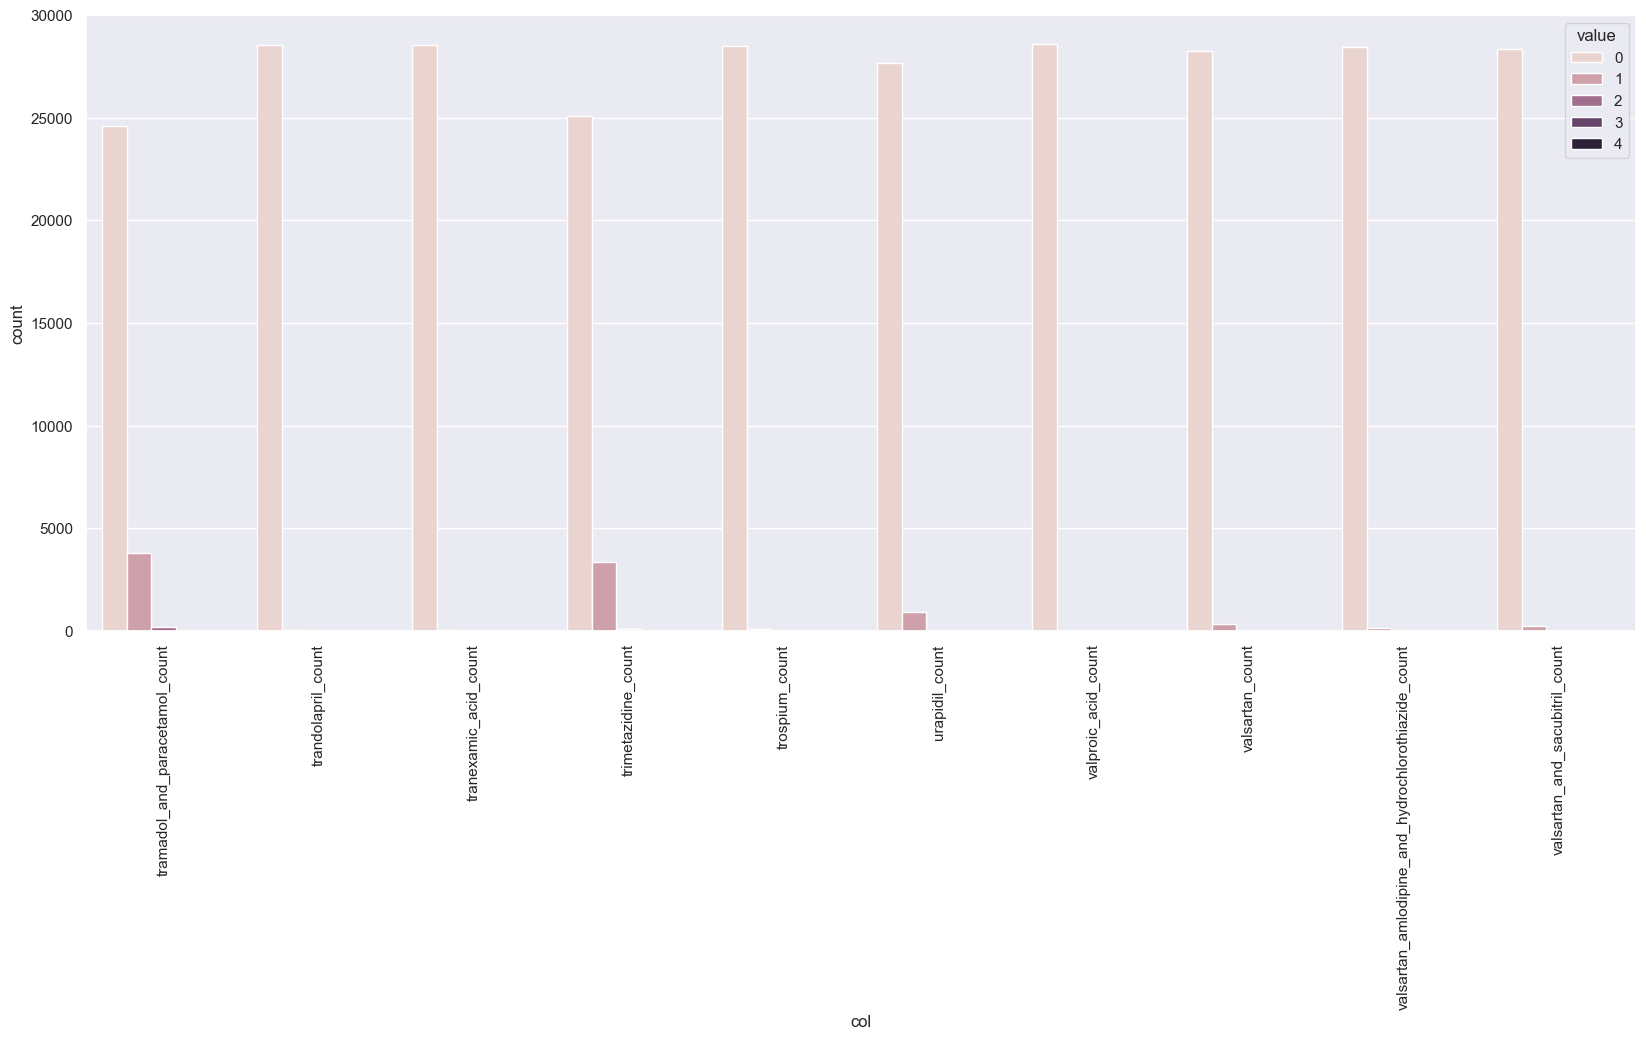

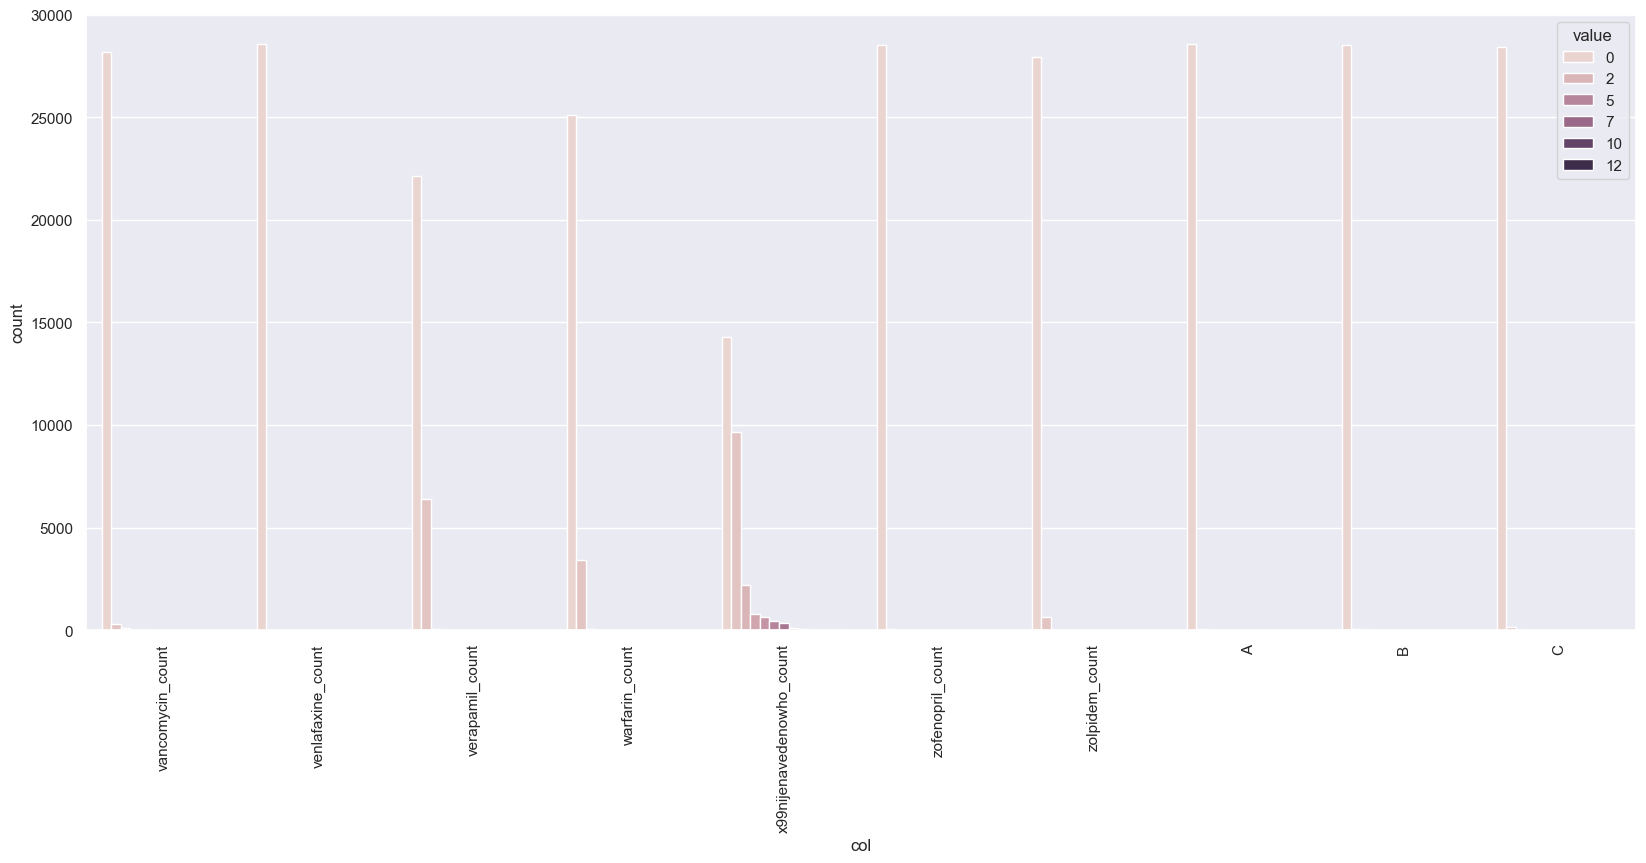

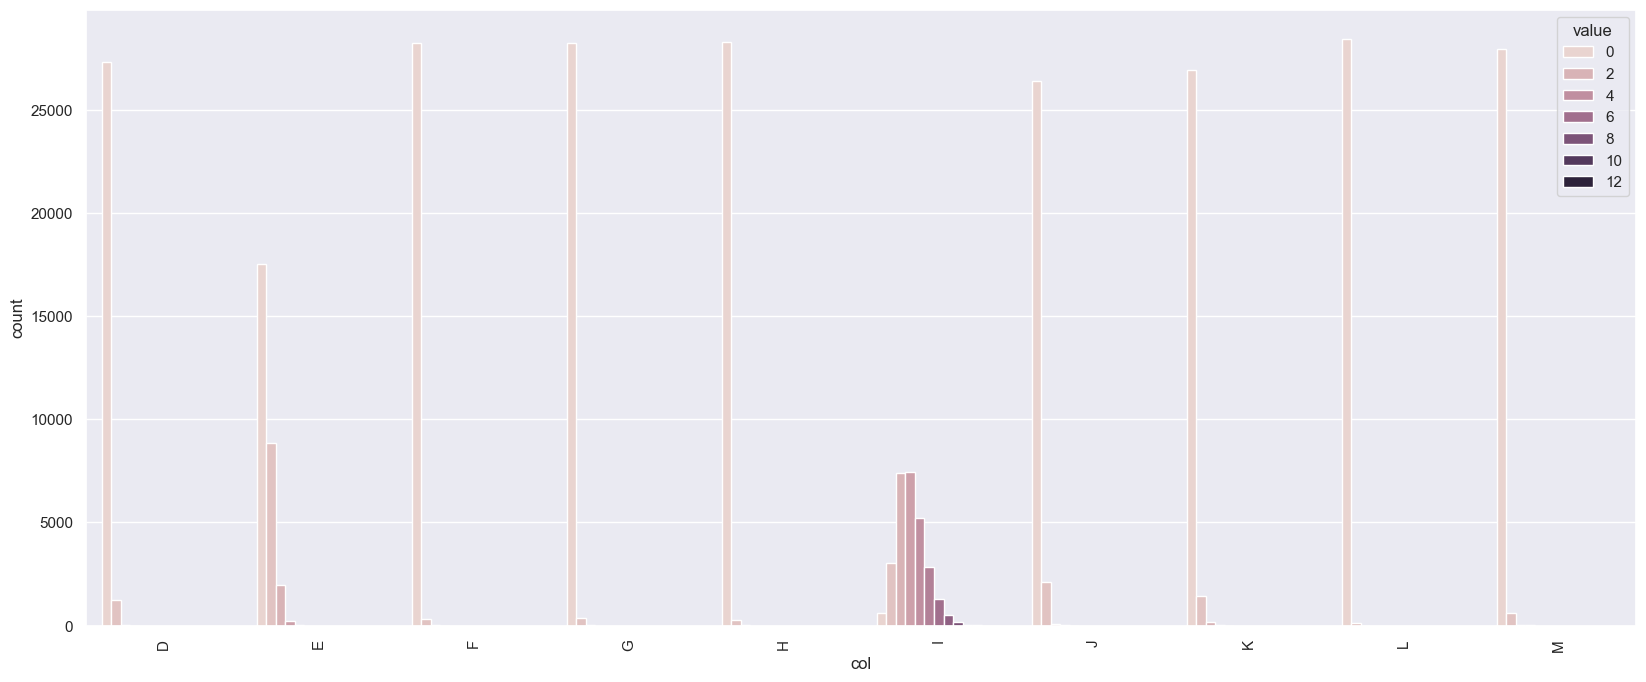

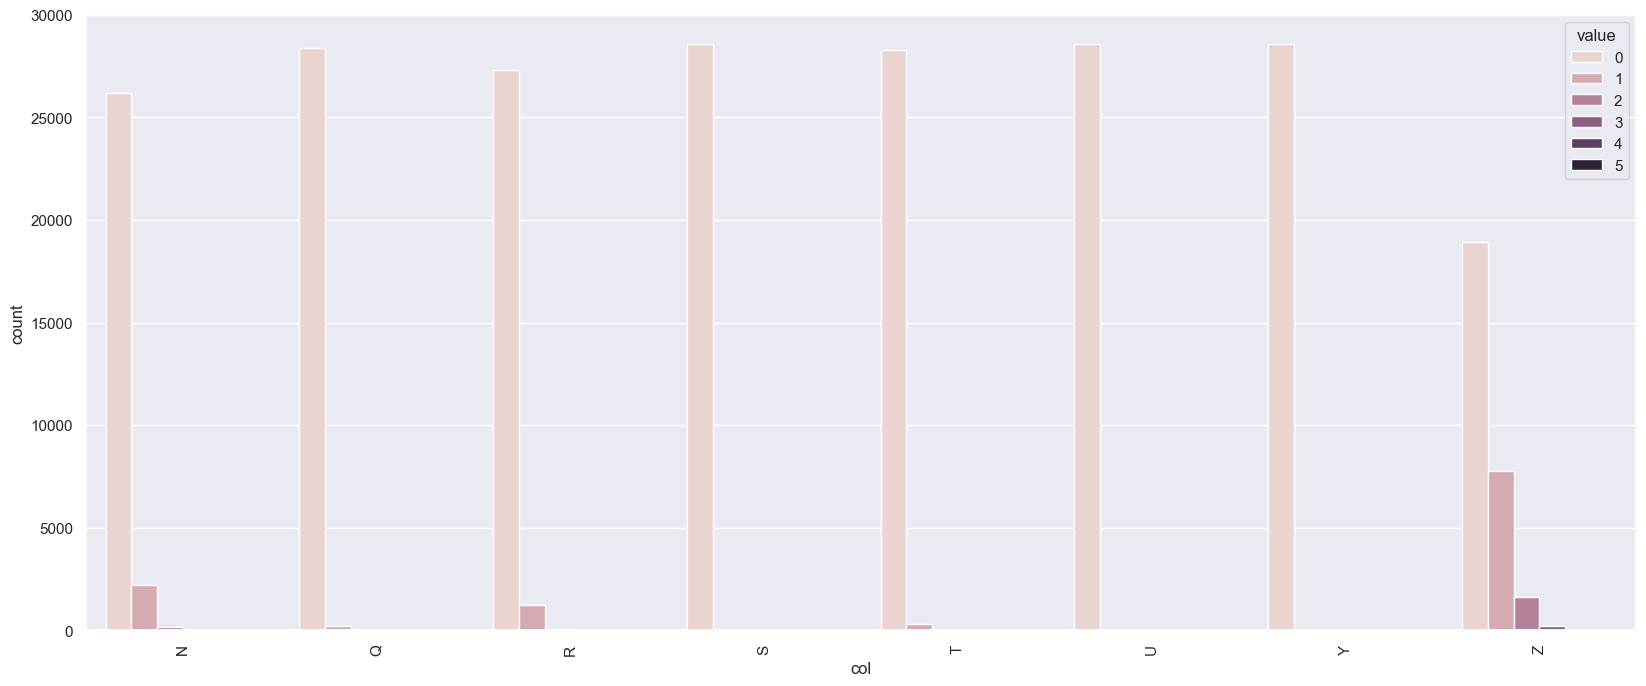

In [67]:
sns.set(rc={'figure.figsize':(20,8)})
for chunk in range(26):
    melted = df[sparse_cols[chunk*10:(chunk+1)*10]].apply(lambda x: x.value_counts()).T.stack().reset_index()
    melted.rename(columns={'level_0': 'col', 'level_1': 'value', 0: 'count'}, inplace=True)
    sns.barplot(data=melted, x='col', y='count', hue='value')
    plt.xticks(rotation=90)
    plt.show()


Vidimo da u train setu, velika većina kolona za ljekova / dijagnoze poprima vrijednost 0 u gotovo 100% slučaja. Takve kolone će biti do neke mjere problematične...